<a href="https://colab.research.google.com/github/yucucan/DSA-210-Term-Project/blob/main/Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preperation

In [355]:
import os
from os.path import join
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# to be used a prefix for file I/O
path_prefix = "/content/drive/My Drive/Colab/DSA 210/Project/Data"

Mounted at /content/drive


In [356]:
worldbank_fname_list_csv = os.listdir(path_prefix)
worldbank_fname_list = [item[:-4] if item.endswith(".csv") else item for item in  os.listdir(path_prefix)]

exceptions_2015 = ["Renewable electricity output (% of total electricity output).csv",]
exceptions_2014 = ["Electric power consumption (kWh per capita).csv"]
len(os.listdir(path_prefix)), len(worldbank_fname_list_csv), len(worldbank_fname_list)

(55, 55, 55)

In [357]:
n = os.listdir(path_prefix)
for item in n:
  if item not in worldbank_fname_list_csv:
    print(item)

In [358]:
from google.colab import userdata
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [359]:
### Basic libraries
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

# Data Preprocessing
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.preprocessing import LabelEncoder


# Model Training
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Gathering Data

In [7]:
!kaggle datasets download -d mathurinache/world-happiness-report

!unzip "world-happiness-report.zip"

Dataset URL: https://www.kaggle.com/datasets/mathurinache/world-happiness-report
License(s): CC0-1.0
Archive:  world-happiness-report.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                
  inflating: 2020.csv                
  inflating: 2021.csv                
  inflating: 2022.csv                


In [8]:
!kaggle datasets download -d azathoth42/myanimelist

!unzip "myanimelist.zip"

Dataset URL: https://www.kaggle.com/datasets/azathoth42/myanimelist
License(s): DbCL-1.0
Archive:  myanimelist.zip
  inflating: AnimeList.csv           
  inflating: UserAnimeList.csv       
  inflating: UserList.csv            
  inflating: anime_cleaned.csv       
  inflating: anime_filtered.csv      
  inflating: animelists_cleaned.csv  
  inflating: animelists_filtered.csv  
  inflating: users_cleaned.csv       
  inflating: users_filtered.csv      


# Data Preprocessing

In [360]:
df = pd.read_csv('2020.csv')
df = df.rename(columns={"Country name": "Country"})
df.sort_values(by='Country', ascending=True, inplace=True)
df = df[df["Country"] != "Kosovo"].copy()
df = df.rename(columns={"Ladder score": "Happiness Score"})
df.reset_index(drop=True, inplace=True)
df['Country'] = df['Country'].str.lower()
df['Country'] = df['Country'].str.strip()
df

Country                  Regional indicator  Happiness Score  \
0    afghanistan                          South Asia           2.5669   
1        albania          Central and Eastern Europe           4.8827   
2        algeria        Middle East and North Africa           5.0051   
3      argentina         Latin America and Caribbean           5.9747   
4        armenia  Commonwealth of Independent States           4.6768   
..           ...                                 ...              ...   
147    venezuela         Latin America and Caribbean           5.0532   
148      vietnam                      Southeast Asia           5.3535   
149        yemen        Middle East and North Africa           3.5274   
150       zambia                  Sub-Saharan Africa           3.7594   
151     zimbabwe                  Sub-Saharan Africa           3.2992   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                          0.031311      2.628270      2.505530   
1                          0.056116      4.992687      4.772713   
2                          0.044236      5.091802      4.918397   
3                          0.053442      6.079446      5.869954   
4                          0.058595      4.791646      4.561953   
..                              ...           ...           ...   
147                        0.064281      5.179190      4.927210   
148                        0.033801      5.419749      5.287251   
149                        0.054158      3.633550      3.421250   
150                        0.060677      3.878326      3.640474   
151                        0.058674      3.414202      3.184198   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                 7.462861        0.470367                52.590000   
1                 9.417931        0.671070                68.708138   
2                 9.537965        0.803385                65.905174   
3                 9.810955        0.900568                68.803802   
4                 9.100476        0.757479                66.750656   
..                     ...             ...                      ...   
147               8.977794        0.890408                66.505341   
148               8.809546        0.849987                67.952736   
149               7.759683        0.817981                56.727283   
150               8.224720        0.698824                55.299377   
151               7.865712        0.763093                55.617260   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                        0.396573   -0.096429                   0.933687   
1                        0.781994   -0.042309                   0.896304   
2                        0.466611   -0.121105                   0.735485   
3                        0.831132   -0.194914                   0.842010   
4                        0.712018   -0.138780                   0.773545   
..                            ...         ...                        ...   
147                      0.623278   -0.169091                   0.837038   
148                      0.939593   -0.094533                   0.796421   
149                      0.599920   -0.157735                   0.800288   
150                      0.806500    0.078037                   0.801290   
151                      0.711458   -0.072064                   0.810237   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                    1.972317                          0.300706   
1                    1.972317                          0.906653   
2                    1.972317                          0.943856   
3                    1.972317                          1.028466   
4                    1.972317                          0.808262   
..                        ...                               ...   
147                  1.972317                          0.770239   
148                  1.97

In [361]:
rows_to_skip = 4
for i in range (len(worldbank_fname_list_csv)):
  fname = worldbank_fname_list_csv[i]
  df_world_bank = pd.read_csv(join(path_prefix, fname), skiprows=rows_to_skip, sep=',', on_bad_lines='skip')

  if 'Country Name' in df_world_bank.columns:
    df_world_bank['Country Name'] = df_world_bank['Country Name'].str.lower().str.strip()
  else:
    print(f"Warning: 'Country Name' column not found in {fname}")
    continue

  df_tmp = df[['Country']].copy()
  if fname in exceptions_2015:
    df_tmp = df_tmp.merge(df_world_bank[['Country Name', '2015']], left_on='Country', right_on='Country Name', how='left')
    df[worldbank_fname_list[i]] = df_tmp['2015']
  elif fname in exceptions_2014:
    df_tmp = df_tmp.merge(df_world_bank[['Country Name', '2014']], left_on='Country', right_on='Country Name', how='left')
    df[worldbank_fname_list[i]] = df_tmp['2014']
  else:
    df_tmp = df_tmp.merge(df_world_bank[['Country Name', '2020']], left_on='Country', right_on='Country Name', how='left')
    df[worldbank_fname_list[i]] = df_tmp['2020']
df

Country                  Regional indicator  Happiness Score  \
0    afghanistan                          South Asia           2.5669   
1        albania          Central and Eastern Europe           4.8827   
2        algeria        Middle East and North Africa           5.0051   
3      argentina         Latin America and Caribbean           5.9747   
4        armenia  Commonwealth of Independent States           4.6768   
..           ...                                 ...              ...   
147    venezuela         Latin America and Caribbean           5.0532   
148      vietnam                      Southeast Asia           5.3535   
149        yemen        Middle East and North Africa           3.5274   
150       zambia                  Sub-Saharan Africa           3.7594   
151     zimbabwe                  Sub-Saharan Africa           3.2992   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                          0.031311      2.628270      2.505530   
1                          0.056116      4.992687      4.772713   
2                          0.044236      5.091802      4.918397   
3                          0.053442      6.079446      5.869954   
4                          0.058595      4.791646      4.561953   
..                              ...           ...           ...   
147                        0.064281      5.179190      4.927210   
148                        0.033801      5.419749      5.287251   
149                        0.054158      3.633550      3.421250   
150                        0.060677      3.878326      3.640474   
151                        0.058674      3.414202      3.184198   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                 7.462861        0.470367                52.590000   
1                 9.417931        0.671070                68.708138   
2                 9.537965        0.803385                65.905174   
3                 9.810955        0.900568                68.803802   
4                 9.100476        0.757479                66.750656   
..                     ...             ...                      ...   
147               8.977794        0.890408                66.505341   
148               8.809546        0.849987                67.952736   
149               7.759683        0.817981                56.727283   
150               8.224720        0.698824                55.299377   
151               7.865712        0.763093                55.617260   

     Freedom to make life choices  ...  \
0                        0.396573  ...   
1                        0.781994  ...   
2                        0.466611  ...   
3                        0.831132  ...   
4                        0.712018  ...   
..                            ...  ...   
147                      0.623278  ...   
148                      0.939593  ...   
149                      0.599920  ...   
150                      0.806500  ...   
151                      0.711458  ...   

     Contraceptive prevalence, any method (% of married women ages 15-49)  \
0                                                  NaN                      
1                                                  NaN                      
2                                                  NaN                      
3                                                 70.1                      
4                                                  NaN                      
..                                                 ...                      
147                                                NaN                      
148                                                NaN                      
149                                                NaN                      
150                                                NaN                      
151                                                NaN                      

     Life expectancy at birth, female (years

In [362]:
df_world_bank.head(5)

Country Name Country Code  \
0                        aruba          ABW   
1  africa eastern and southern          AFE   
2                  afghanistan          AFG   
3   africa western and central          AFW   
4                       angola          AGO   

                             Indicator Name  Indicator Code      1960  \
0  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  4.820000   
1  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  6.723226   
2  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  7.282000   
3  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  6.459063   
4  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  6.708000   

       1961      1962      1963      1964      1965  ...      2015      2016  \
0  4.655000  4.471000  4.271000  4.059000  3.842000  ...  1.972000  1.953000   
1  6.742124  6.762343  6.778133  6.787821  6.799767  ...  4.678619  4.616540   
2  7.284000  7.292000  7.302000  7.304000  7.305000  ...  5.405000  5.262000   
3  6.472099  6.492395  6.506528  6.525529  6.541022  ...  5.388622  5.333061   
4  6.790000  6.872000  6.954000  7.036000  7.116000  ...  5.774000  5.686000   

       2017      2018      2019      2020      2021      2022  2023  \
0  1.839000  1.587000  1.486000  1.325000  1.180000  1.179000   NaN   
1  4.570828  4.526445  4.480001  4.412125  4.348564  4.281848   NaN   
2  5.129000  5.002000  4.870000  4.750000  4.643000  4.523000   NaN   
3  5.260538  5.191528  5.124368  5.055090  4.984759  4.903347   NaN   
4  5.600000  5.519000  5.442000  5.371000  5.304000  5.209000   NaN   

   Unnamed: 68  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 69 columns]

In [363]:
for col in df.columns:
    if df[col].isnull().any():
        nan_sum = df[col].isnull().sum()
        print(f"Column '{col}' has {nan_sum} NaN values.")
        if nan_sum > 50:
          df.drop(columns=[col], inplace=True)
          print(f"Column '{col}' has been dropped.")

Column 'High-technology exports (current US$)' has 35 NaN values.
Column 'Forest area (% of land area)' has 22 NaN values.
Column 'Government expenditure on education, total (% of GDP)' has 34 NaN values.
Column 'GDP per capita growth (annual %)' has 23 NaN values.
Column 'Urban population (% of total population)' has 22 NaN values.
Column 'Net migration' has 22 NaN values.
Column 'GNI per capita, PPP (current international $)' has 23 NaN values.
Column 'Exports of goods and services (% of GDP)' has 29 NaN values.
Column 'Agriculture, forestry, and fishing, value added (% of GDP)' has 23 NaN values.
Column 'Literacy rate, adult total (% of people ages 15 and above)' has 124 NaN values.
Column 'Literacy rate, adult total (% of people ages 15 and above)' has been dropped.
Column 'Access to electricity (% of population)' has 22 NaN values.
Column 'Population growth (annual %)' has 22 NaN values.
Column 'Renewable electricity output (% of total electricity output)' has 22 NaN values.
Colum

In [364]:
df.head(5)

Country                  Regional indicator  Happiness Score  \
0  afghanistan                          South Asia           2.5669   
1      albania          Central and Eastern Europe           4.8827   
2      algeria        Middle East and North Africa           5.0051   
3    argentina         Latin America and Caribbean           5.9747   
4      armenia  Commonwealth of Independent States           4.6768   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031311      2.628270      2.505530   
1                        0.056116      4.992687      4.772713   
2                        0.044236      5.091802      4.918397   
3                        0.053442      6.079446      5.869954   
4                        0.058595      4.791646      4.561953   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0               7.462861        0.470367                52.590000   
1               9.417931        0.671070                68.708138   
2               9.537965        0.803385                65.905174   
3               9.810955        0.900568                68.803802   
4               9.100476        0.757479                66.750656   

   Freedom to make life choices  ...  \
0                      0.396573  ...   
1                      0.781994  ...   
2                      0.466611  ...   
3                      0.831132  ...   
4                      0.712018  ...   

   Refugee population by country or territory of asylum  \
0                                            72278.0      
1                                              105.0      
2                                            97651.0      
3                                             3965.0      
4                                           107910.0      

   Life expectancy at birth, male (years)  \
0                                  59.866   
1                                  74.632   
2                                  73.082   
3                                  72.546   
4                                  67.051   

   Life expectancy at birth, female (years)  \
0                                    65.432   
1                                    79.676   
2                                    75.912   
3                                    79.285   
4                                    76.996   

   Medium and high-tech exports (% manufactured exports)  \
0                                           0.340964       
1                                           8.413831       
2                                           3.948754       
3                                          36.383624       
4                                          11.910508       

   Military expenditure (% of GDP)  Inflation, consumer prices (annual %)  \
0                         1.358857                                    NaN   
1                         1.295836                               1.620887   
2                         6.658711                               2.415131   
3                         0.734112                                    NaN   
4                         4.982544                               1.211436   

   Population, total  GDP per capita (current US$)  \
0         39068979.0                    510.787063   
1          2837849.0                   5370.778623   
2         44042091.0                   3743.541952   
3         45191965.0                   8535.599380   
4          2961500.0                   4268.680933   

   Unemployment, total (% of total labor force) (modeled ILO estimate)  \
0                                             11.710                     
1                                             11.690                     
2                                             14.057                     
3                                             11.461                     
4                                             18.175                     

   Fertility rate, total (birt

In [365]:
country_list = df['Country'].tolist()

In [366]:
users = pd.read_csv('users_cleaned.csv')
users['join_date'] = pd.to_datetime(users['join_date'])
users['last_online'] = pd.to_datetime(users['last_online'])
users['birth_date'] = pd.to_datetime(users['birth_date'])
now = datetime.datetime.now()
users['age'] = (now - users['birth_date']).dt.days / 365.25
users['age'] = users['age'].astype(int)
users

username  user_id  user_watching  user_completed  user_onhold  \
0             karthiga  2255153              3              49            1   
1            Damonashu    37326             45             195           27   
2                bskai   228342             25             414            2   
3       terune_uzumaki   327311              5               5            0   
4                Bas_G  5015094             35             114            6   
...                ...      ...            ...             ...          ...   
108706          isoann   797785             14             213           11   
108707        bumcakee  1396285             13             116            5   
108708       Scarlet95  2478991              6             103           10   
108709        Torasori  3975907             22             239            0   
108710          HMicca  1289601             11              73            2   

        user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0                  0                 0                 55.091667  Female   
1                 25                59                 82.574306    Male   
2                  5                11                159.483333    Male   
3                  0                 0                 11.394444  Female   
4                 20               175                 30.458333    Male   
...              ...               ...                       ...     ...   
108706            20               136                 64.372222    Male   
108707             9                22                 41.365972  Female   
108708             8                54                 46.827083  Female   
108709             4               176                 72.361111    Male   
108710             2                16                 64.431250  Female   

                      location birth_date  access_rank  join_date  \
0              Chennai, India  1990-04-29          NaN 2013-03-03   
1             Detroit,Michigan 1991-08-01          NaN 2008-02-13   
2              Nayarit, Mexico 1990-12-14          NaN 2009-08-31   
3            Malaysia, Kuantan 1998-08-24          NaN 2010-05-10   
4          Nijmegen, Nederland 1999-10-24          NaN 2015-11-26   
...                        ...        ...          ...        ...   
108706                 Poland: 1997-01-13          NaN 2011-10-23   
108707  nhollywood, california 1998-07-18          NaN 2012-07-14   
108708                 Belgium 1995-10-17          NaN 2013-04-24   
108709            Latvia, Riga 1998-11-18          NaN 2014-07-30   
108710     Birmingham, England 1995-08-12          NaN 2012-05-05   

               last_online  stats_mean_score  stats_rewatched  stats_episodes  \
0      2014-02-04 01:32:00              7.43              0.0            3391   
1      2017-07-10 06:52:54              6.15              6.0            4903   
2      2014-05-12 16:35:00              8.27              1.0            9701   
3      2012-10-18 19:06:00              9.70              6.0             697   
4      2018-05-10 20:53:37              7.86              0.0            1847   
...                    ...               ...              ...             ...   
108706 2018-02-25 01:20:27              8.03              2.0            3939   
108707 2017-02-14 00:30:00              8.86             24.0            2537   
108708 2016-12-18 08:41:00              7.40              1.0            2869   
108709 2018-05-24 21:34:46              8.98             47.0            4469   
108710 2012-11-15 08:10:00              8.89             11.0            3822   

        age  
0        34  
1        33  
2        34  
3        26  
4        25  
...     ...  
108706   28  
108707   26  
108708   29  
108709   26  
108710   29  

[108711 rows x 18 columns]

In [367]:
if 'access_rank' in users.columns:
    users = users.drop(columns=['access_rank'])
    print("Column 'access_rank' dropped successfully from users.")
else:
    print("Column 'access_rank' not found in users.")

if 'user_id' in users.columns:
    users = users.drop(columns=['user_id'])
    print("Column 'user_id' dropped successfully from users.")
else:
    print("Column 'user_id' not found in users.")

Column 'access_rank' dropped successfully from users.
Column 'user_id' dropped successfully from users.


In [368]:
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado",
    "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho",
    "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
    "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
    "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York",
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon",
    "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota",
    "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington",
    "West Virginia", "Wisconsin", "Wyoming"
]
us_states_lower = [state.lower() for state in us_states]

In [369]:
def find_country(input):
  input = str(input)
  if input == 'nan':
    return 'Other'
  else:
    for country in country_list:
      if country in input.lower():
        return country
    for state in us_states_lower:
      if state in input.lower():
        return 'united states'
    return 'Other'

In [370]:
users['Country'] = users['location'].apply(find_country)
users

username  user_watching  user_completed  user_onhold  \
0             karthiga              3              49            1   
1            Damonashu             45             195           27   
2                bskai             25             414            2   
3       terune_uzumaki              5               5            0   
4                Bas_G             35             114            6   
...                ...            ...             ...          ...   
108706          isoann             14             213           11   
108707        bumcakee             13             116            5   
108708       Scarlet95              6             103           10   
108709        Torasori             22             239            0   
108710          HMicca             11              73            2   

        user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0                  0                 0                 55.091667  Female   
1                 25                59                 82.574306    Male   
2                  5                11                159.483333    Male   
3                  0                 0                 11.394444  Female   
4                 20               175                 30.458333    Male   
...              ...               ...                       ...     ...   
108706            20               136                 64.372222    Male   
108707             9                22                 41.365972  Female   
108708             8                54                 46.827083  Female   
108709             4               176                 72.361111    Male   
108710             2                16                 64.431250  Female   

                      location birth_date  join_date         last_online  \
0              Chennai, India  1990-04-29 2013-03-03 2014-02-04 01:32:00   
1             Detroit,Michigan 1991-08-01 2008-02-13 2017-07-10 06:52:54   
2              Nayarit, Mexico 1990-12-14 2009-08-31 2014-05-12 16:35:00   
3            Malaysia, Kuantan 1998-08-24 2010-05-10 2012-10-18 19:06:00   
4          Nijmegen, Nederland 1999-10-24 2015-11-26 2018-05-10 20:53:37   
...                        ...        ...        ...                 ...   
108706                 Poland: 1997-01-13 2011-10-23 2018-02-25 01:20:27   
108707  nhollywood, california 1998-07-18 2012-07-14 2017-02-14 00:30:00   
108708                 Belgium 1995-10-17 2013-04-24 2016-12-18 08:41:00   
108709            Latvia, Riga 1998-11-18 2014-07-30 2018-05-24 21:34:46   
108710     Birmingham, England 1995-08-12 2012-05-05 2012-11-15 08:10:00   

        stats_mean_score  stats_rewatched  stats_episodes  age        Country  
0                   7.43              0.0            3391   34          india  
1                   6.15              6.0            4903   33  united states  
2                   8.27              1.0            9701   34         mexico  
3                   9.70              6.0             697   26       malaysia  
4                   7.86              0.0            1847   25          Other  
...                  ...              ...             ...  ...            ...  
108706              8.03              2.0            3939   28         poland  
108707              8.86             24.0            2537   26  united states  
108708              7.40              1.0            2869   29        belgium  
108709              8.98             47.0            4469   26         latvia  
108710              8.89             11.0            3822   29          Other  

[108711 rows x 17 columns]

In [371]:
if 'location' in users.columns:
    users = users.drop(columns=['location'])
    print("Column 'location' dropped successfully from users.")
else:
    print("Column 'location' not found in users.")

Column 'location' dropped successfully from users.


In [372]:
other_count = users[users['Country'] == 'Other'].shape[0]
print(f"Number of 'Other' values in the 'Country' column: {other_count}")

Number of 'Other' values in the 'Country' column: 40904


In [373]:
users = users[users['Country'] != 'Other']
users = users[users['user_completed'] != 0]
users = users[users['stats_mean_score'] != 0]
users = users[users['gender'].isin(['Male', 'Female'])]
users.reset_index(drop=True, inplace=True)
users

username  user_watching  user_completed  user_onhold  \
0            karthiga              3              49            1   
1           Damonashu             45             195           27   
2               bskai             25             414            2   
3      terune_uzumaki              5               5            0   
4            HimeAria              2              87            2   
...               ...            ...             ...          ...   
65823       ZeroFr3aK             36             179           12   
65824          isoann             14             213           11   
65825        bumcakee             13             116            5   
65826       Scarlet95              6             103           10   
65827        Torasori             22             239            0   

       user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0                 0                 0                 55.091667  Female   
1                25                59                 82.574306    Male   
2                 5                11                159.483333    Male   
3                 0                 0                 11.394444  Female   
4                 0                28                 19.963194  Female   
...             ...               ...                       ...     ...   
65823             0                38                125.084028    Male   
65824            20               136                 64.372222    Male   
65825             9                22                 41.365972  Female   
65826             8                54                 46.827083  Female   
65827             4               176                 72.361111    Male   

      birth_date  join_date         last_online  stats_mean_score  \
0     1990-04-29 2013-03-03 2014-02-04 01:32:00              7.43   
1     1991-08-01 2008-02-13 2017-07-10 06:52:54              6.15   
2     1990-12-14 2009-08-31 2014-05-12 16:35:00              8.27   
3     1998-08-24 2010-05-10 2012-10-18 19:06:00              9.70   
4     1996-09-26 2013-09-08 2018-01-14 13:05:42              8.23   
...          ...        ...                 ...               ...   
65823 1993-02-14 2011-04-11 2018-04-09 18:01:39              7.41   
65824 1997-01-13 2011-10-23 2018-02-25 01:20:27              8.03   
65825 1998-07-18 2012-07-14 2017-02-14 00:30:00              8.86   
65826 1995-10-17 2013-04-24 2016-12-18 08:41:00              7.40   
65827 1998-11-18 2014-07-30 2018-05-24 21:34:46              8.98   

       stats_rewatched  stats_episodes  age        Country  
0                  0.0            3391   34          india  
1                  6.0            4903   33  united states  
2                  1.0            9701   34         mexico  
3                  6.0             697   26       malaysia  
4                  0.0            1314   28         poland  
...                ...             ...  ...            ...  
65823              6.0            7598   32         sweden  
65824              2.0            3939   28         poland  
65825             24.0            2537   26  united states  
65826              1.0            2869   29        belgium  
65827             47.0            4469   26         latvia  

[65828 rows x 16 columns]

In [374]:
user_country_stats = pd.merge(users, df, on='Country', how='inner')
user_country_stats

username  user_watching  user_completed  user_onhold  \
0            karthiga              3              49            1   
1           Damonashu             45             195           27   
2               bskai             25             414            2   
3      terune_uzumaki              5               5            0   
4            HimeAria              2              87            2   
...               ...            ...             ...          ...   
65823       ZeroFr3aK             36             179           12   
65824          isoann             14             213           11   
65825        bumcakee             13             116            5   
65826       Scarlet95              6             103           10   
65827        Torasori             22             239            0   

       user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0                 0                 0                 55.091667  Female   
1                25                59                 82.574306    Male   
2                 5                11                159.483333    Male   
3                 0                 0                 11.394444  Female   
4                 0                28                 19.963194  Female   
...             ...               ...                       ...     ...   
65823             0                38                125.084028    Male   
65824            20               136                 64.372222    Male   
65825             9                22                 41.365972  Female   
65826             8                54                 46.827083  Female   
65827             4               176                 72.361111    Male   

      birth_date  join_date  ...  \
0     1990-04-29 2013-03-03  ...   
1     1991-08-01 2008-02-13  ...   
2     1990-12-14 2009-08-31  ...   
3     1998-08-24 2010-05-10  ...   
4     1996-09-26 2013-09-08  ...   
...          ...        ...  ...   
65823 1993-02-14 2011-04-11  ...   
65824 1997-01-13 2011-10-23  ...   
65825 1998-07-18 2012-07-14  ...   
65826 1995-10-17 2013-04-24  ...   
65827 1998-11-18 2014-07-30  ...   

      Refugee population by country or territory of asylum  \
0                                               195373.0     
1                                               340846.0     
2                                                45434.0     
3                                               129902.0     
4                                                 2771.0     
...                                                  ...     
65823                                           248372.0     
65824                                             2771.0     
65825                                           340846.0     
65826                                            64973.0     
65827                                              637.0     

       Life expectancy at birth, male (years)  \
0                                      68.615   
1                                      74.200   
2                                      66.334   
3                                      73.648   
4                                      72.500   
...                                       ...   
65823                                  80.600   
65824                                  72.500   
65825                                  74.200   
65826                                  78.500   
65827                                  70.600   

       Life expectancy at birth, female (years)  \
0                                        71.824   
1                                        79.900   
2                                        74.314   
3                                        78.472   
4                                        80.700   
...                                         ...   
65823                                    84.200   
65824                                    80.700   
65825                                    79.900   
65826 

In [375]:
for col in user_country_stats.columns:
    if user_country_stats[col].isnull().any():
        nan_sum = user_country_stats[col].isnull().sum()
        print(f"Column '{col}' has {nan_sum} NaN values.")
        if nan_sum > 5000:
          user_country_stats.drop(columns=[col], inplace=True)
          print(f"Column '{col}' has been dropped.")

Column 'username' has 1 NaN values.
Column 'High-technology exports (current US$)' has 4748 NaN values.
Column 'Forest area (% of land area)' has 4350 NaN values.
Column 'Government expenditure on education, total (% of GDP)' has 5395 NaN values.
Column 'Government expenditure on education, total (% of GDP)' has been dropped.
Column 'GDP per capita growth (annual %)' has 4350 NaN values.
Column 'Urban population (% of total population)' has 4350 NaN values.
Column 'Net migration' has 4350 NaN values.
Column 'GNI per capita, PPP (current international $)' has 4350 NaN values.
Column 'Exports of goods and services (% of GDP)' has 4419 NaN values.
Column 'Agriculture, forestry, and fishing, value added (% of GDP)' has 4350 NaN values.
Column 'Access to electricity (% of population)' has 4350 NaN values.
Column 'Population growth (annual %)' has 4350 NaN values.
Column 'Renewable electricity output (% of total electricity output)' has 4350 NaN values.
Column 'Electric power consumption (kW

In [376]:
if 'Inflation, consumer prices (annual %)' in user_country_stats.columns:
    user_country_stats.dropna(subset=['Inflation, consumer prices (annual %)'], inplace=True)
    print("Rows with missing values in 'Inflation, consumer prices (annual %)' dropped.")
else:
    print("'Inflation, consumer prices (annual %)' column not found in the DataFrame.")

user_country_stats

Rows with missing values in 'Inflation, consumer prices (annual %)' dropped.


username  user_watching  user_completed  user_onhold  \
0            karthiga              3              49            1   
1           Damonashu             45             195           27   
2               bskai             25             414            2   
3      terune_uzumaki              5               5            0   
4            HimeAria              2              87            2   
...               ...            ...             ...          ...   
65823       ZeroFr3aK             36             179           12   
65824          isoann             14             213           11   
65825        bumcakee             13             116            5   
65826       Scarlet95              6             103           10   
65827        Torasori             22             239            0   

       user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0                 0                 0                 55.091667  Female   
1                25                59                 82.574306    Male   
2                 5                11                159.483333    Male   
3                 0                 0                 11.394444  Female   
4                 0                28                 19.963194  Female   
...             ...               ...                       ...     ...   
65823             0                38                125.084028    Male   
65824            20               136                 64.372222    Male   
65825             9                22                 41.365972  Female   
65826             8                54                 46.827083  Female   
65827             4               176                 72.361111    Male   

      birth_date  join_date  ...  \
0     1990-04-29 2013-03-03  ...   
1     1991-08-01 2008-02-13  ...   
2     1990-12-14 2009-08-31  ...   
3     1998-08-24 2010-05-10  ...   
4     1996-09-26 2013-09-08  ...   
...          ...        ...  ...   
65823 1993-02-14 2011-04-11  ...   
65824 1997-01-13 2011-10-23  ...   
65825 1998-07-18 2012-07-14  ...   
65826 1995-10-17 2013-04-24  ...   
65827 1998-11-18 2014-07-30  ...   

      Population in the largest city (% of urban population)  \
0                                               6.183360       
1                                               6.861272       
2                                              21.278889       
3                                              30.581567       
4                                               7.836489       
...                                                  ...       
65823                                          17.925800       
65824                                           7.836489       
65825                                           6.861272       
65826                                          18.386478       
65827                                          48.578594       

       Life expectancy at birth, male (years)  \
0                                      68.615   
1                                      74.200   
2                                      66.334   
3                                      73.648   
4                                      72.500   
...                                       ...   
65823                                  80.600   
65824                                  72.500   
65825                                  74.200   
65826                                  78.500   
65827                                  70.600   

       Life expectancy at birth, female (years)  \
0                                        71.824   
1                                        79.900   
2                                        74.314   
3                                        78.472   
4                                        80.700   
...                                         ...   
65823                                    84.200   
65824                                    80.700   
65825                            

In [377]:
for col in user_country_stats.columns:
    if user_country_stats[col].isnull().any():
        nan_sum = user_country_stats[col].isnull().sum()
        print(f"Column '{col}' has {nan_sum} NaN values.")

Column 'username' has 1 NaN values.
Column 'High-technology exports (current US$)' has 398 NaN values.
Column 'Exports of goods and services (% of GDP)' has 53 NaN values.
Column 'Electric power consumption (kWh per capita)' has 31 NaN values.
Column 'Renewable internal freshwater resources per capita (cubic meters)' has 14 NaN values.
Column 'Population in the largest city (% of urban population)' has 312 NaN values.
Column 'Medium and high-tech exports (% manufactured exports)' has 41 NaN values.
Column 'Military expenditure (% of GDP)' has 252 NaN values.


In [378]:
if 'username' in user_country_stats.columns:
    user_country_stats.dropna(subset=['username'], inplace=True)
    print("Rows with missing values in 'username' dropped.")
else:
    print("'username' column not found in the DataFrame.")

Rows with missing values in 'username' dropped.


In [379]:
numeric_columns = user_country_stats.select_dtypes(include=np.number).columns
user_country_stats[numeric_columns] = user_country_stats[numeric_columns].fillna(user_country_stats[numeric_columns].mean())

In [380]:
for col in user_country_stats.columns:
    if user_country_stats[col].isnull().any():
        nan_sum = user_country_stats[col].isnull().sum()
        print(f"Column '{col}' has {nan_sum} NaN values.")

In [381]:
if 'upperwhisker' in user_country_stats.columns:
    user_country_stats = user_country_stats.drop(columns=['upperwhisker'])
    print("Column 'upperwhisker' dropped successfully from user_country_stats.")
else:
    print("Column 'upperwhisker' not found in user_country_stats.")

if 'lowerwhisker' in user_country_stats.columns:
    user_country_stats = user_country_stats.drop(columns=['lowerwhisker'])
    print("Column 'lowerwhisker' dropped successfully from user_country_stats.")
else:
    print("Column 'lowerwhisker' not found in user_country_stats.")

if 'Standard error of ladder score' in user_country_stats.columns:
    user_country_stats = user_country_stats.drop(columns=['Standard error of ladder score'])
    print("Column 'Standard error of ladder score' dropped successfully from user_country_stats.")
else:
    print("Column 'Standard error of ladder score' not found in user_country_stats.")

Column 'upperwhisker' dropped successfully from user_country_stats.
Column 'lowerwhisker' dropped successfully from user_country_stats.
Column 'Standard error of ladder score' dropped successfully from user_country_stats.


In [382]:
label_encoder = LabelEncoder()
user_country_stats['Regional indicator'] = label_encoder.fit_transform(user_country_stats['Regional indicator'])

In [383]:
user_country_stats['gender_numeric'] = user_country_stats['gender'].map({'Male': 0, 'Female': 1})

In [384]:
user_country_stats.columns

Index(['username', 'user_watching', 'user_completed', 'user_onhold',
       'user_dropped', 'user_plantowatch', 'user_days_spent_watching',
       'gender', 'birth_date', 'join_date', 'last_online', 'stats_mean_score',
       'stats_rewatched', 'stats_episodes', 'age', 'Country',
       'Regional indicator', 'Happiness Score', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'High-technology exports (current US$)',
       'Forest area (% of land area)', 'GDP per capita growth (annual %)',
       'Urban population (% of total population)', 'Net migration',
       'G

# Conduct Exploratory Data Analysis

In [385]:
numerical_features = ['age',
                      'stats_mean_score',
                      'Happiness Score',
                      'user_days_spent_watching',
                      'user_completed',
                      'GDP per capita (current US$)',
                      'Logged GDP per capita',
                      'Social support',
                      'Healthy life expectancy',
                      'Dystopia + residual',
                      'Freedom to make life choices',
                      'Generosity',
                      'Perceptions of corruption',
                      'user_watching',
                      'user_plantowatch']

interesting_pairs = [
    ('Happiness Score', 'Logged GDP per capita'),
    ('Happiness Score', 'Healthy life expectancy'),
    ('stats_mean_score', 'user_completed'),
    ('user_days_spent_watching', 'user_completed'),
]

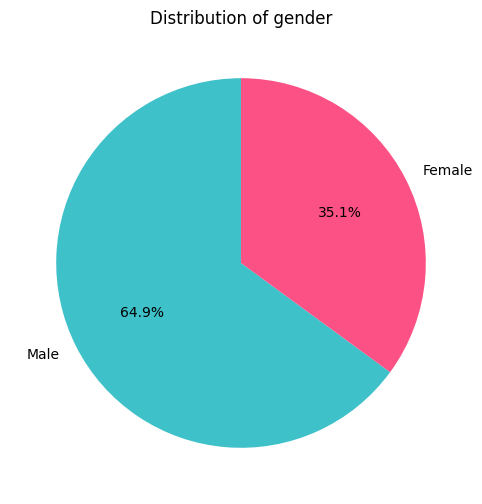

In [386]:
categorical_feature = 'gender'
my_colors = ['#3FC1C9', '#FC5185']

gender_counts = user_country_stats[categorical_feature].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=my_colors)
plt.title(f'Distribution of {categorical_feature}')
plt.show()

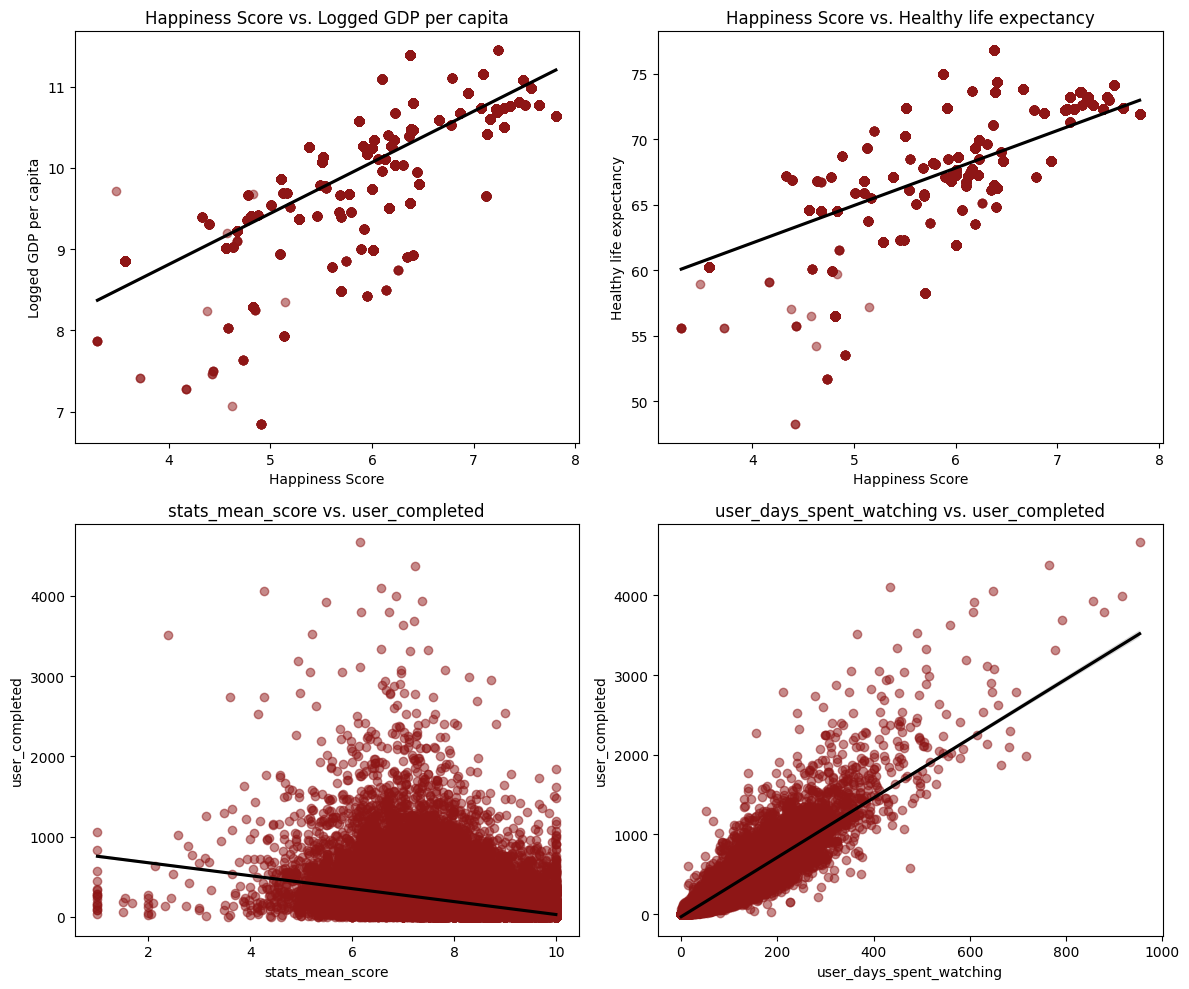

In [387]:
num_pairs = len(interesting_pairs)
num_cols = 2
num_rows = math.ceil(num_pairs / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
axes = axes.flatten()

for i, pair in enumerate(interesting_pairs):
    feature1, feature2 = pair
    sns.regplot(x=feature1, y=feature2, data=user_country_stats, scatter_kws={'alpha': 0.5, 'color': '#8E1616'}, line_kws={'color': 'black'}, ax=axes[i])
    axes[i].set_title(f'{feature1} vs. {feature2}')

for i in range(num_pairs, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

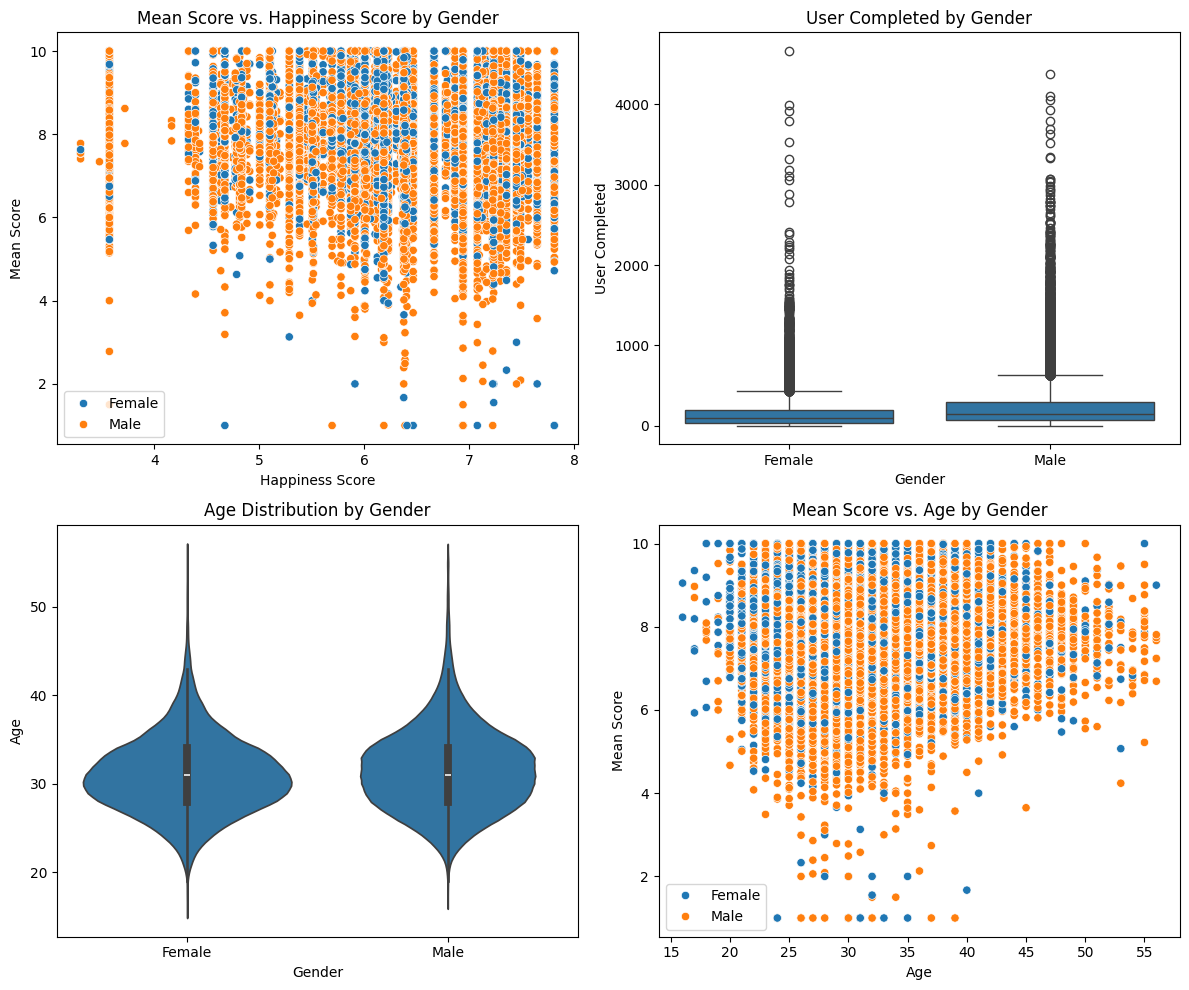

In [388]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(x='Happiness Score', y='stats_mean_score', hue='gender', data=user_country_stats, ax=axes[0, 0])
axes[0, 0].set_title('Mean Score vs. Happiness Score by Gender')
axes[0, 0].set_xlabel('Happiness Score')
axes[0, 0].set_ylabel('Mean Score')
axes[0, 0].legend()

sns.boxplot(x='gender', y='user_completed', data=user_country_stats, ax=axes[0, 1])
axes[0, 1].set_title('User Completed by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('User Completed')

sns.violinplot(x='gender', y='age', data=user_country_stats, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution by Gender')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Age')

sns.scatterplot(x='age', y='stats_mean_score', hue='gender', data=user_country_stats, ax=axes[1, 1])
axes[1, 1].set_title('Mean Score vs. Age by Gender')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Mean Score')
axes[1, 1].legend()


plt.tight_layout()
plt.show();

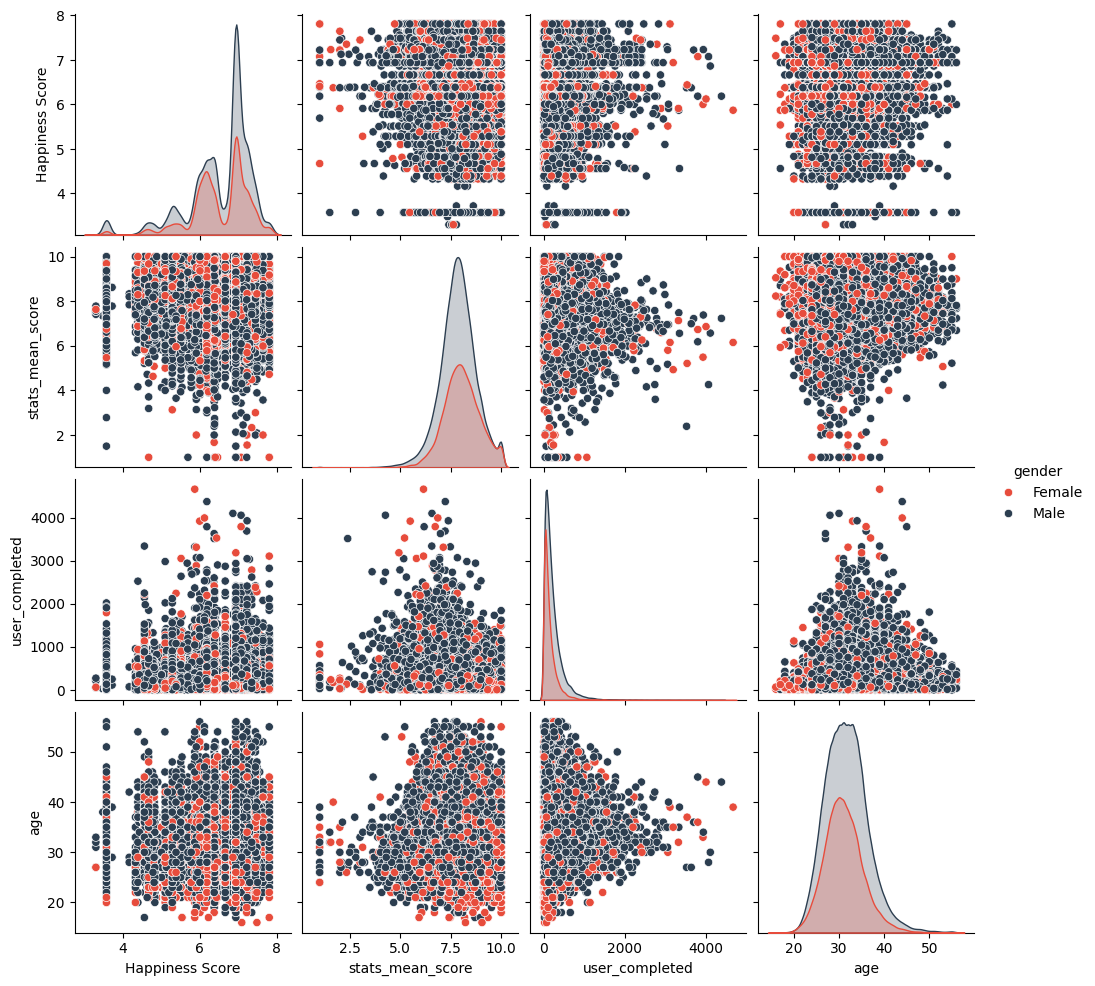

In [389]:
sns.pairplot(user_country_stats,
             vars=['Happiness Score', 'stats_mean_score', 'user_completed', 'age'],
             hue='gender',
             palette={'Male': '#2C3E50', 'Female': '#E74C3C'})
plt.show()

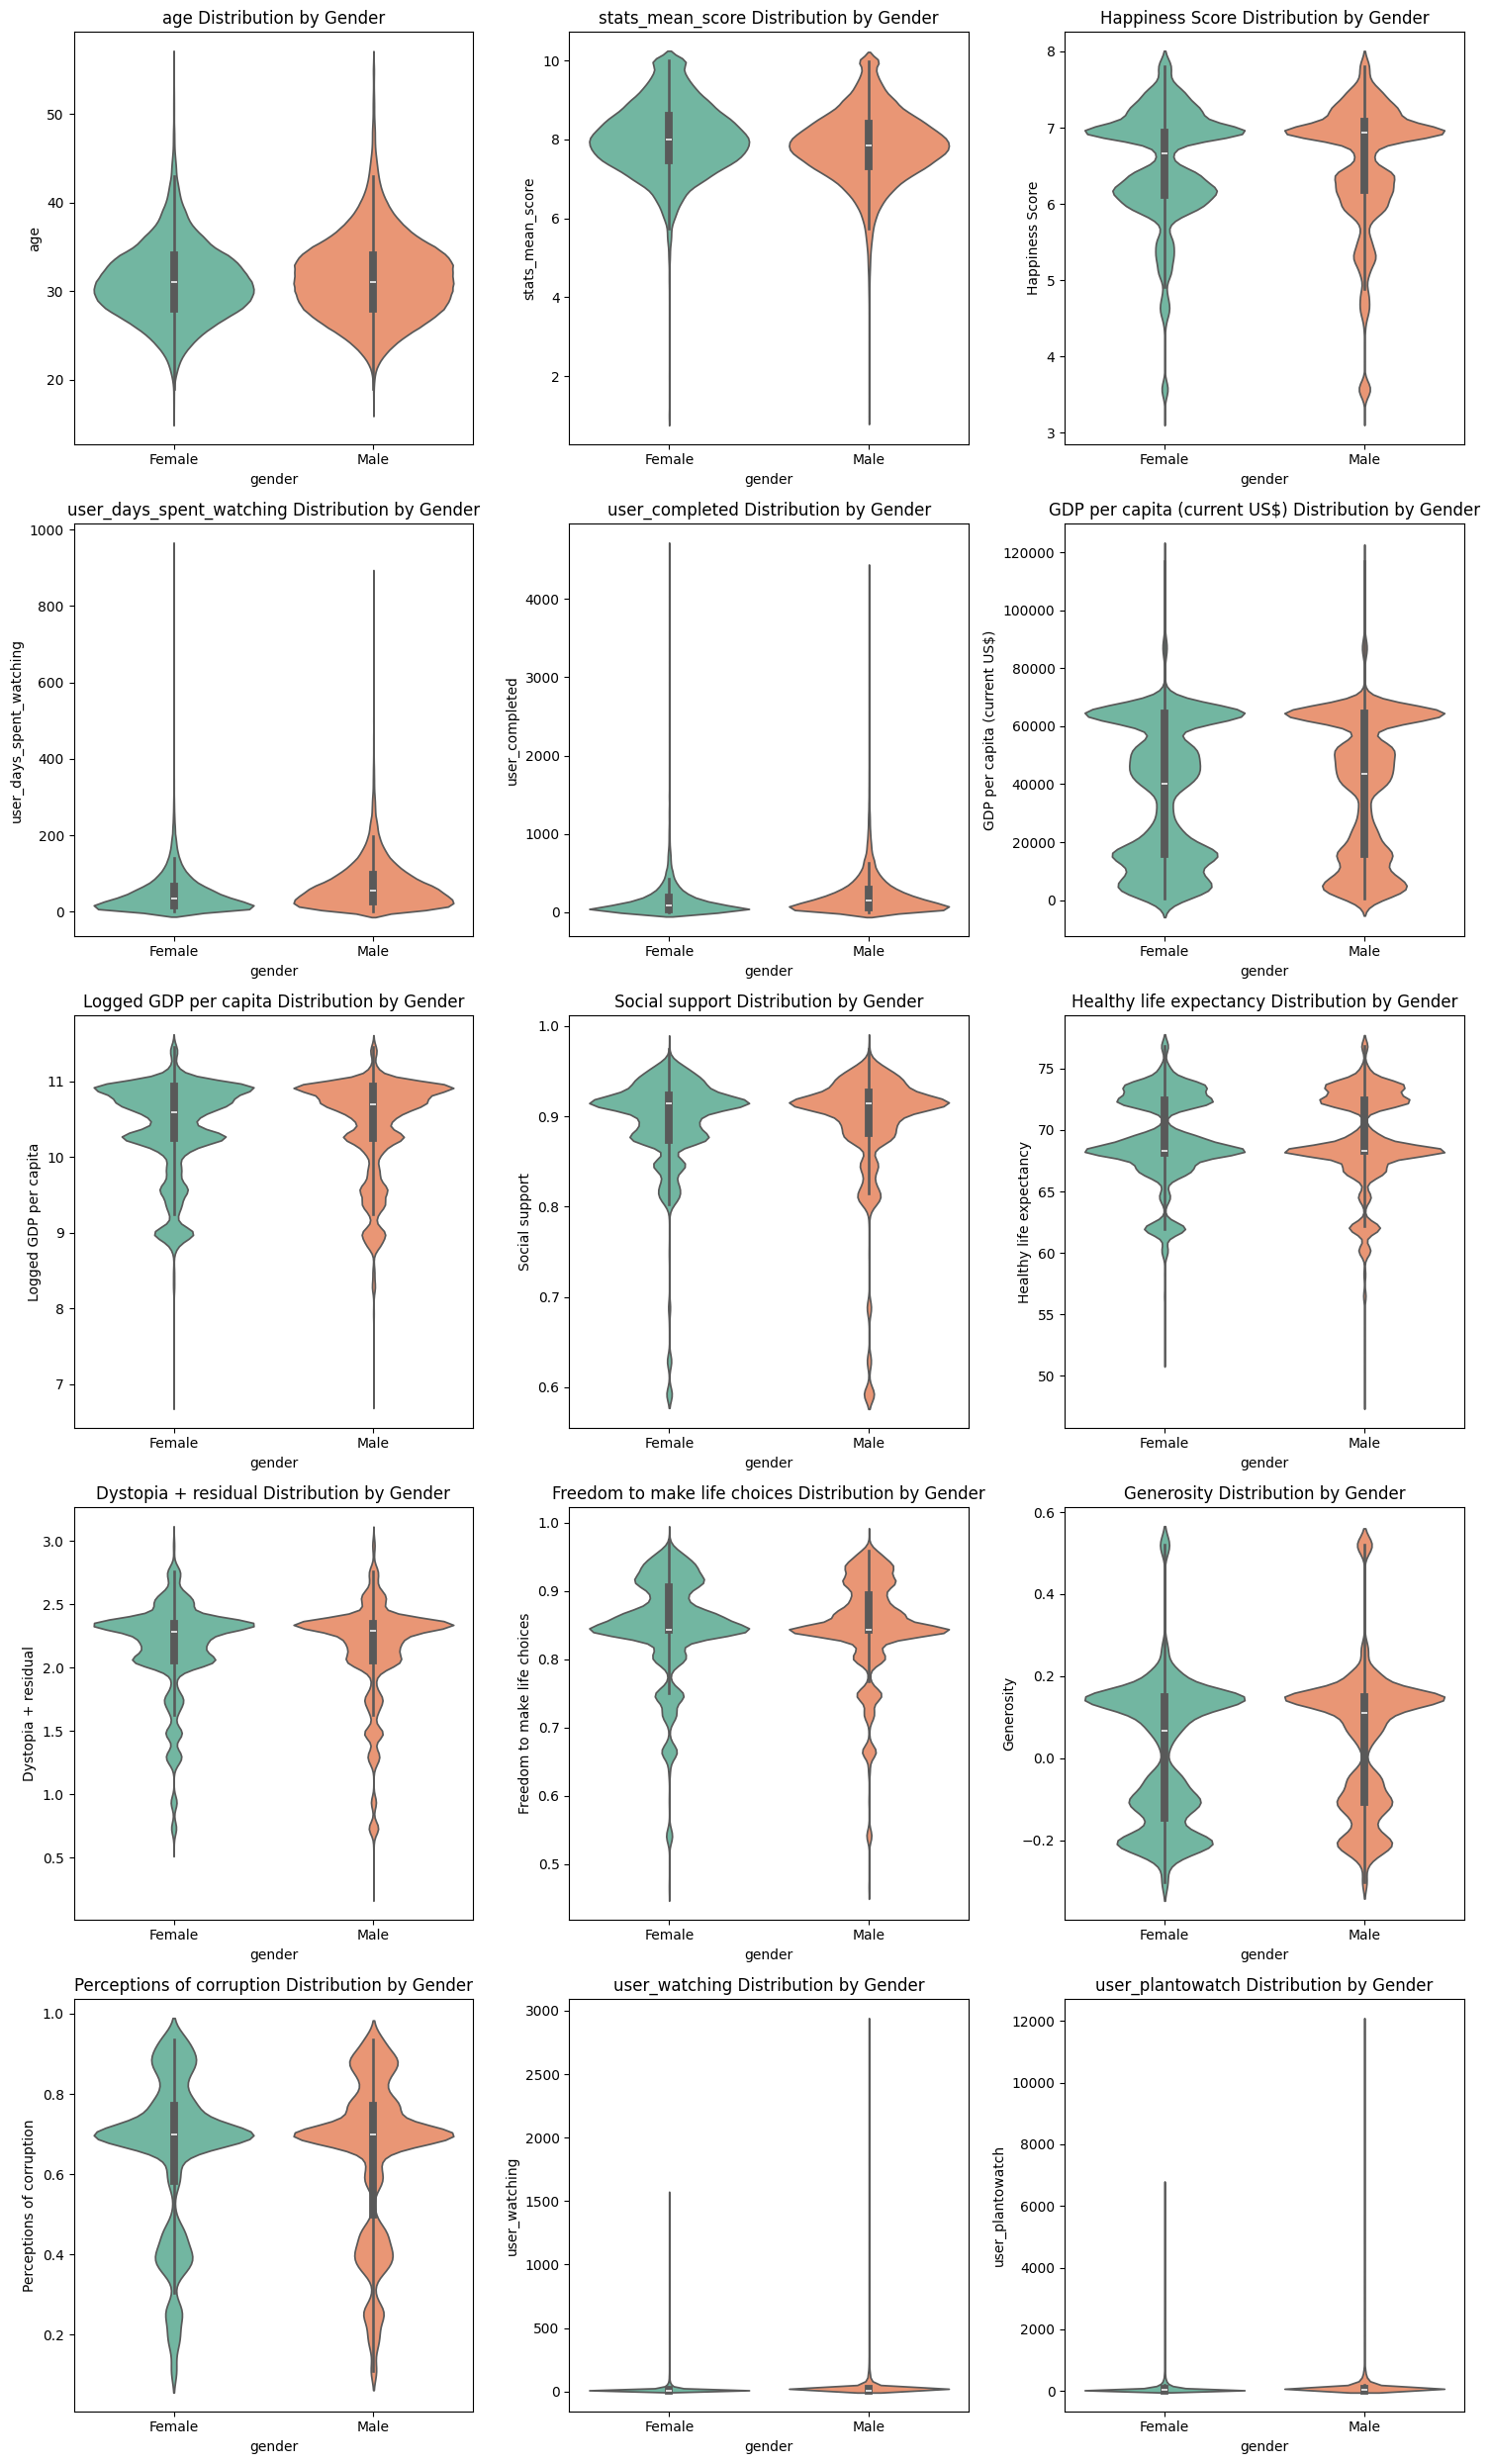

In [390]:
num_features = len(numerical_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.violinplot(x='gender', y=feature, data=user_country_stats, ax=axes[i], hue='gender', palette="Set2", legend=False)
    axes[i].set_title(f'{feature} Distribution by Gender')

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

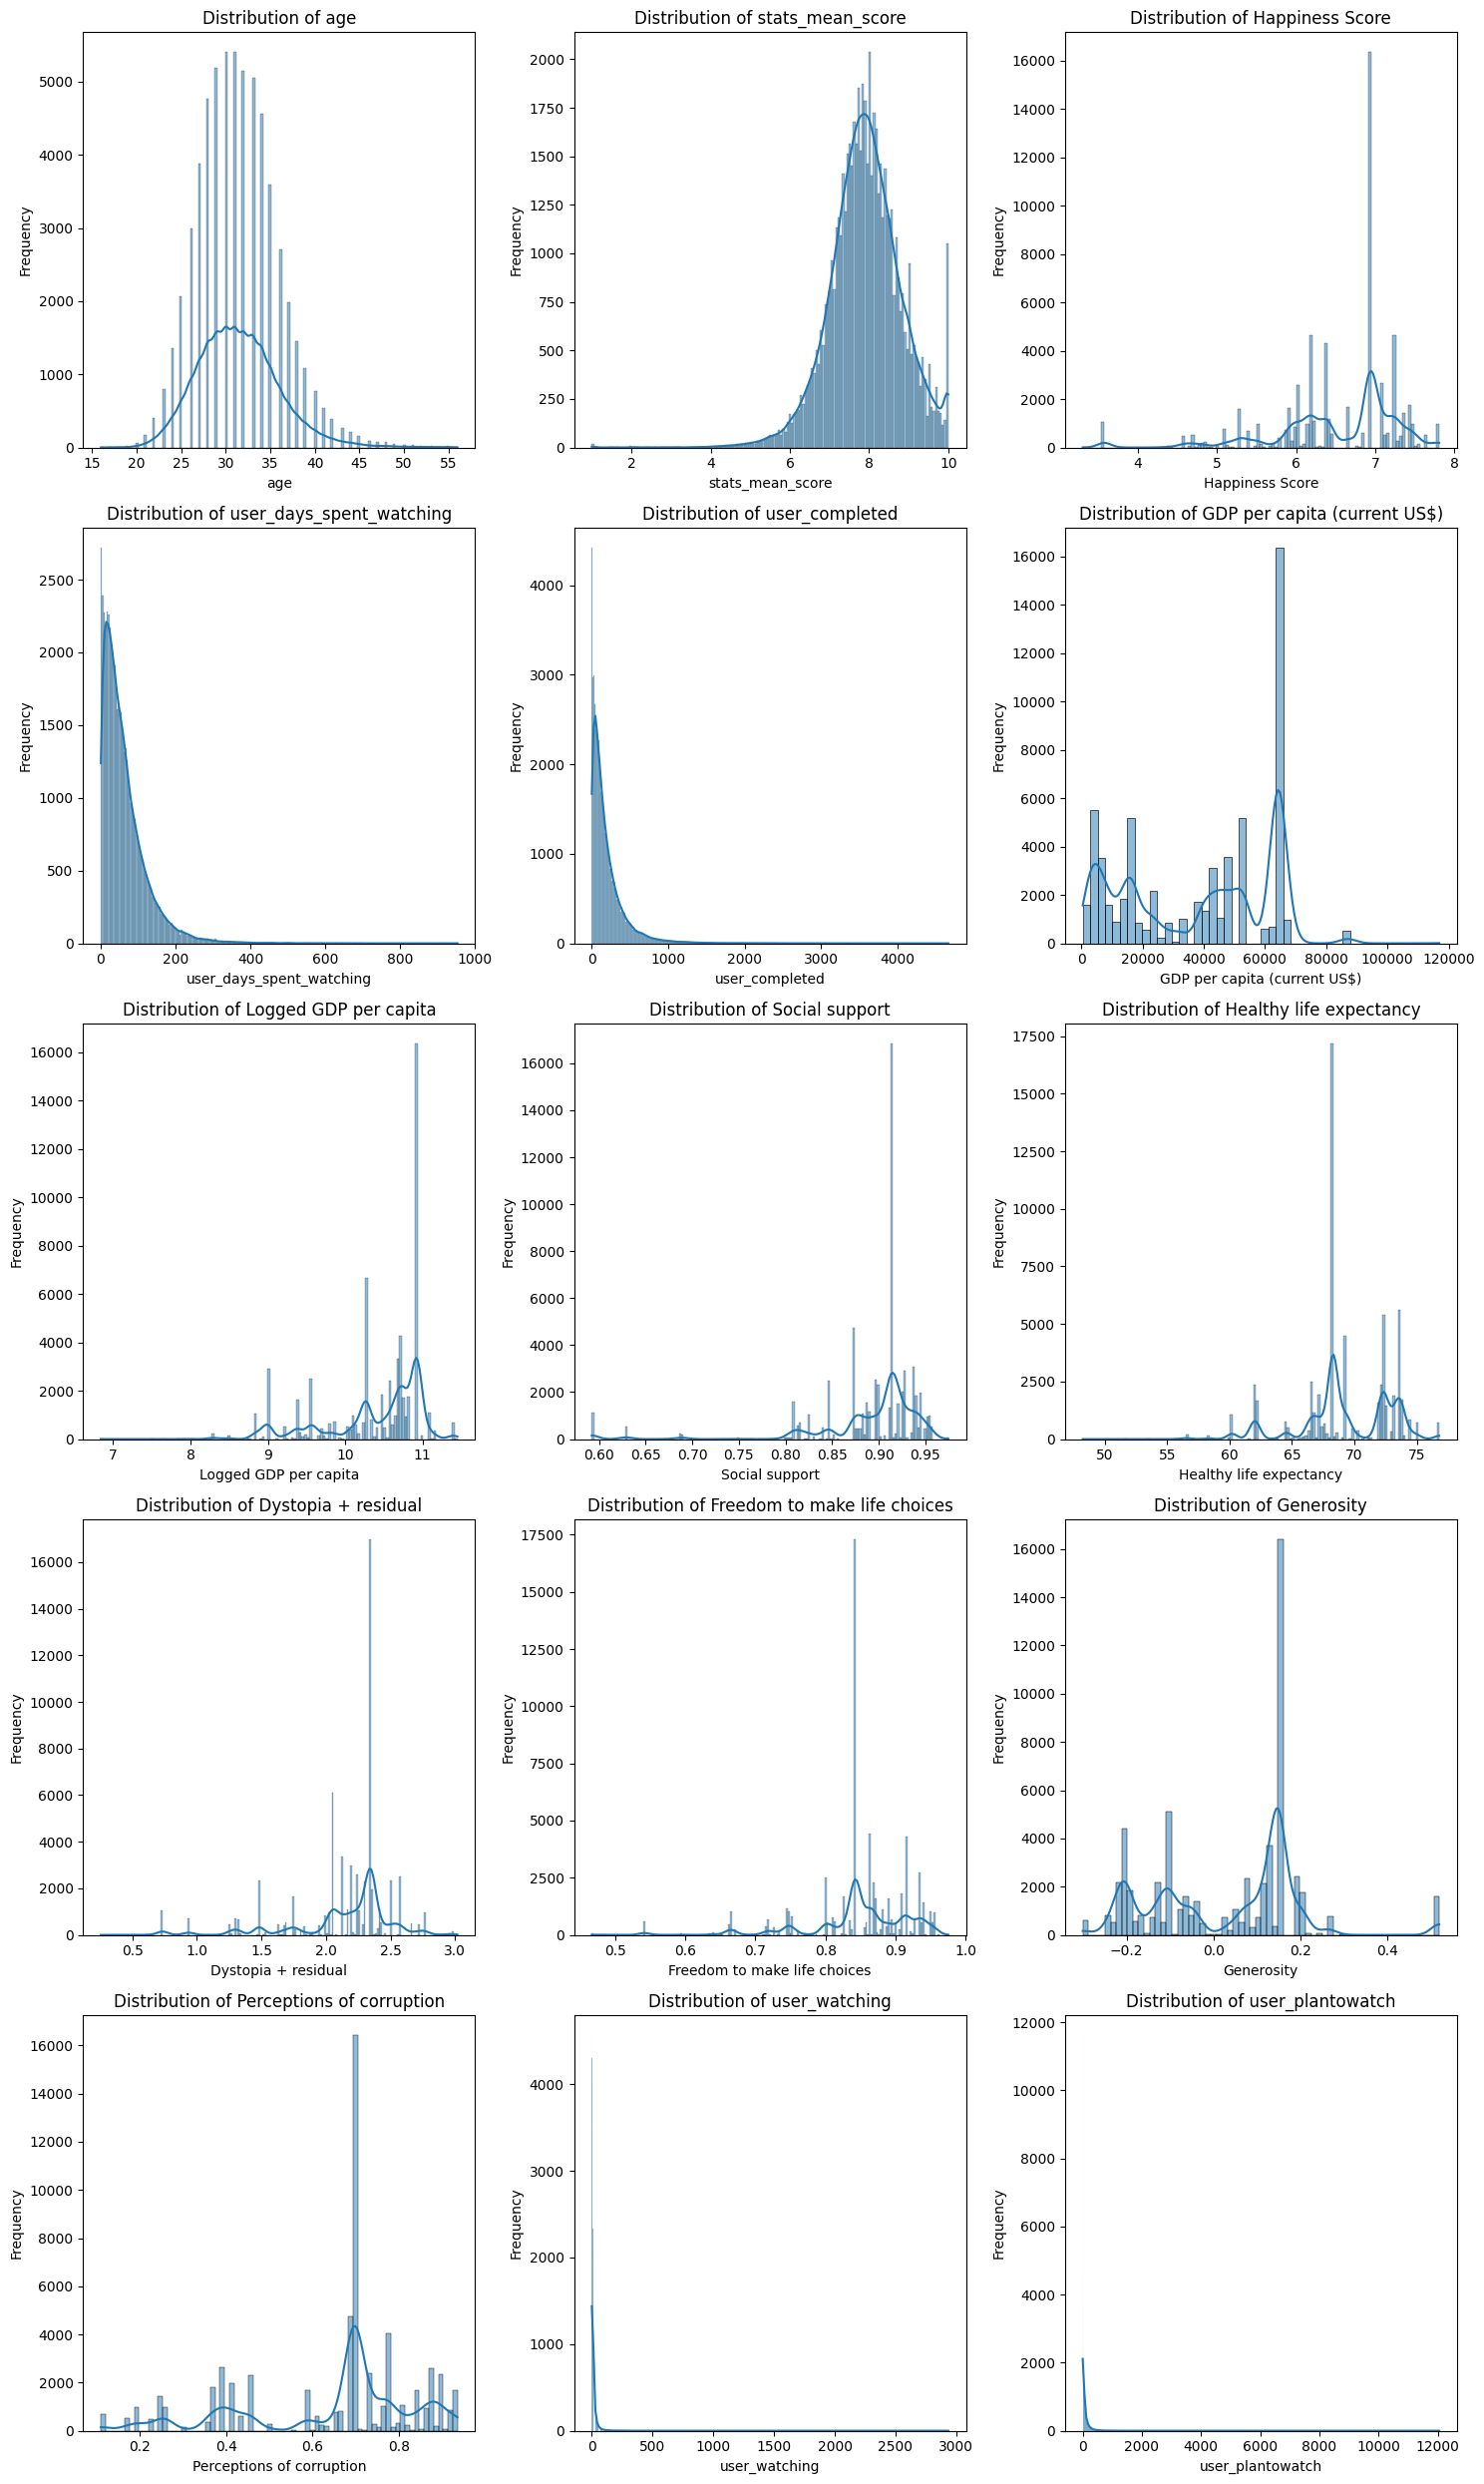

In [391]:
num_rows = 5
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(user_country_stats[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

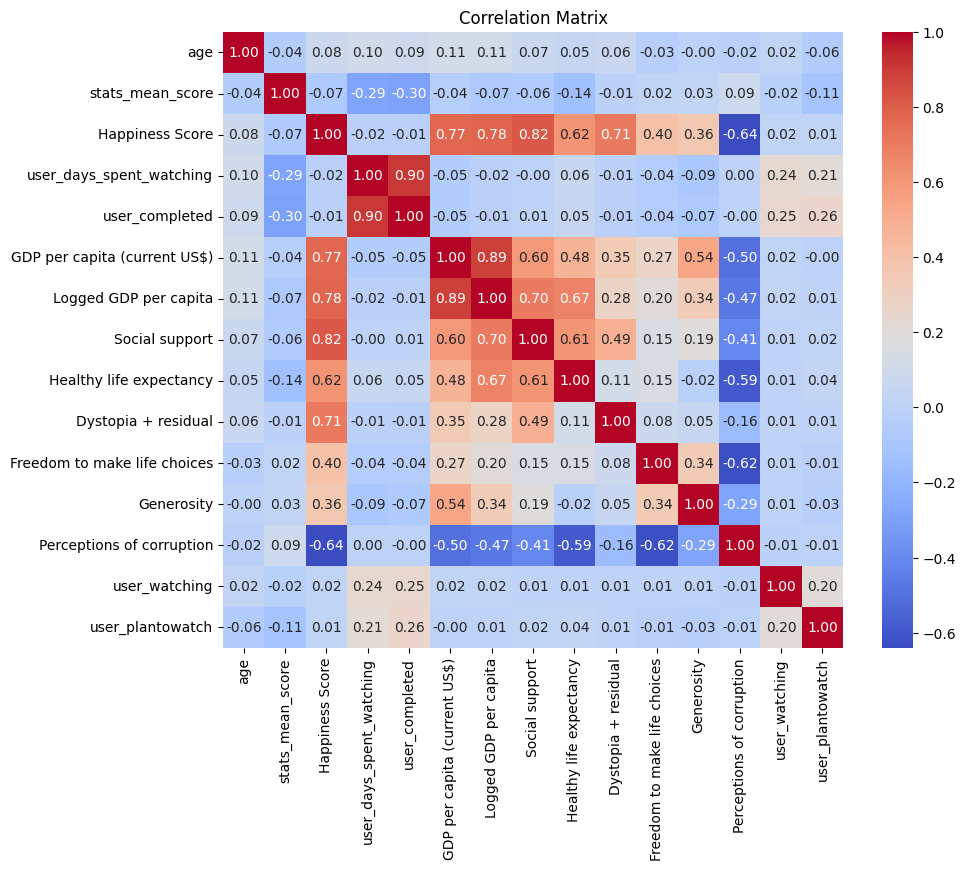

In [392]:
correlation_matrix = user_country_stats[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

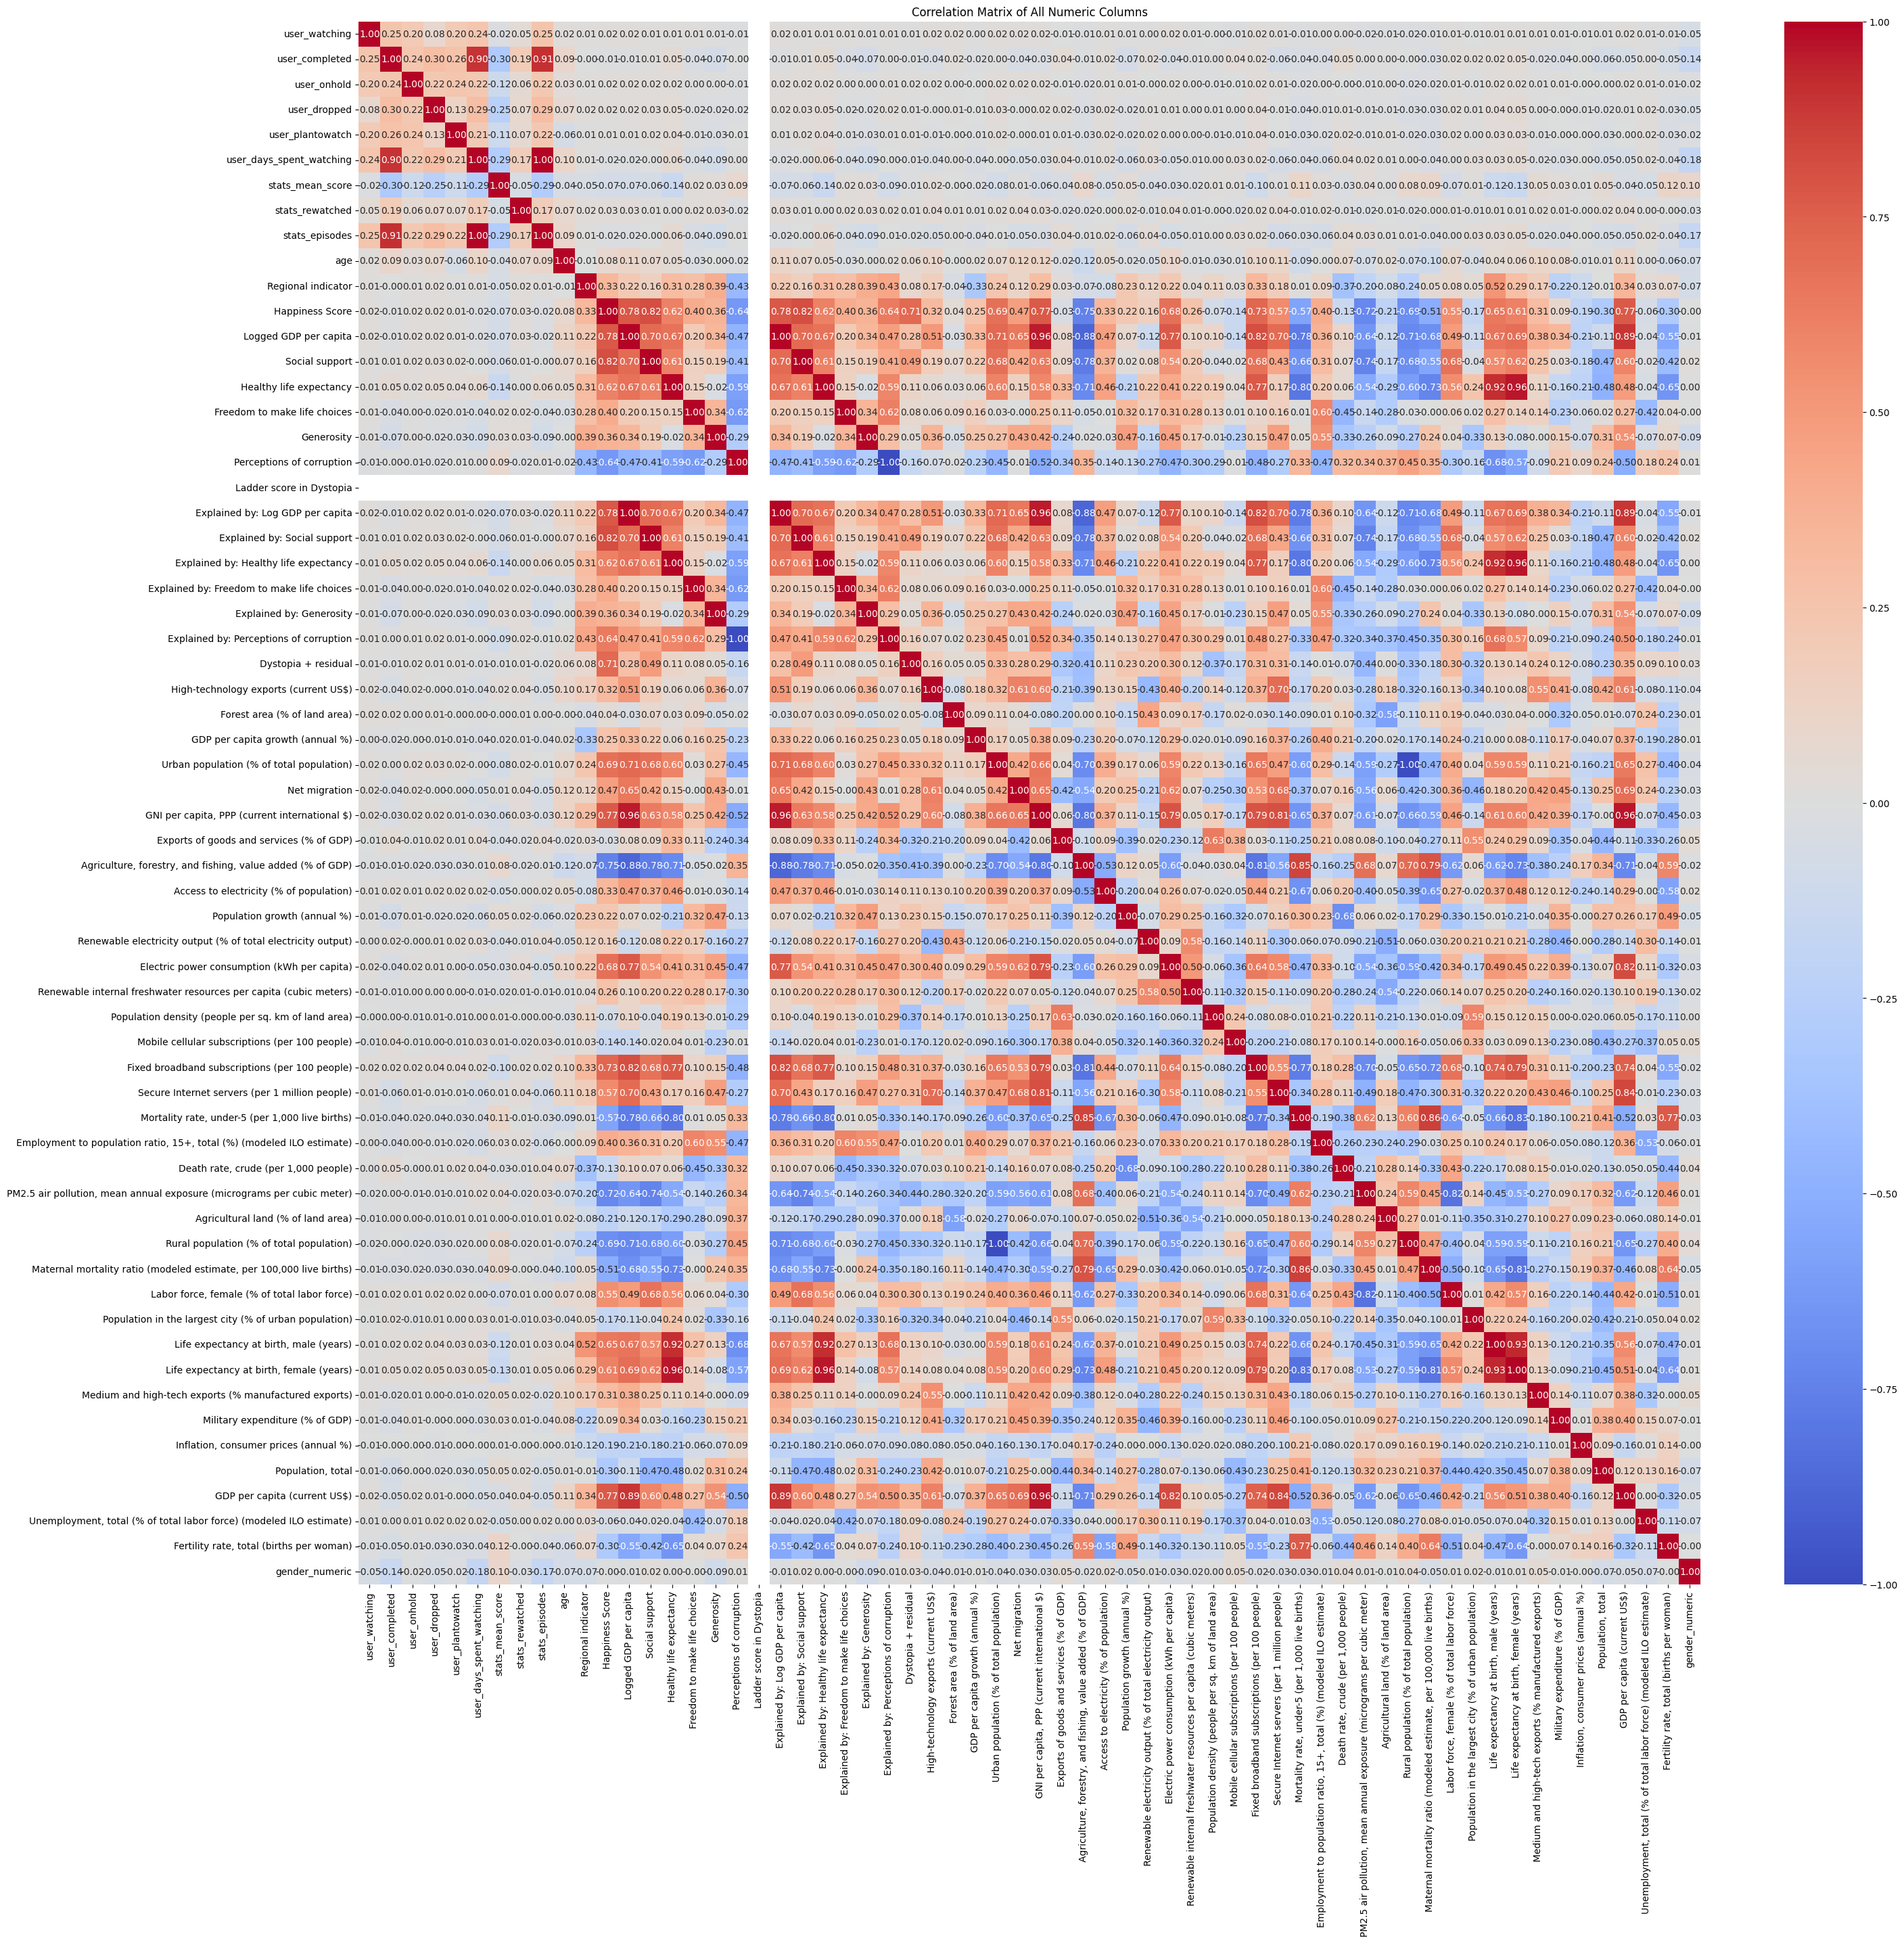

In [393]:
numeric_columns = user_country_stats.select_dtypes(include=[np.number]).columns

correlation_matrix = user_country_stats[numeric_columns].corr()

plt.figure(figsize=(32, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Numeric Columns')
plt.show()

# Hypothesis Tests

The threshold for the hypotheses is α = 0.05. If the p-value is less than or equal to α, we reject the null hypothesis and conclude that the variables are likely dependent. If the p-value is greater than α, we fail to reject the null hypothesis and conclude that the variables are likely independent.

**H1**: Users with a higher 'Mean Score' tend to have higher engagement metrics, such as a larger number of 'User Completed' anime and more 'User Days Spent Watching', suggesting satisfaction leads to deeper engagement

In [394]:
correlation_with_completed = user_country_stats['stats_mean_score'].corr(user_country_stats['user_completed'])
correlation_with_days_spent = user_country_stats['stats_mean_score'].corr(user_country_stats['user_days_spent_watching'])

print(f"Correlation between Mean Score and User Completed: {correlation_with_completed}")
print(f"Correlation between Mean Score and User Days Spent Watching: {correlation_with_days_spent}")

Correlation between Mean Score and User Completed: -0.2983295936486229
Correlation between Mean Score and User Days Spent Watching: -0.28560726935590597


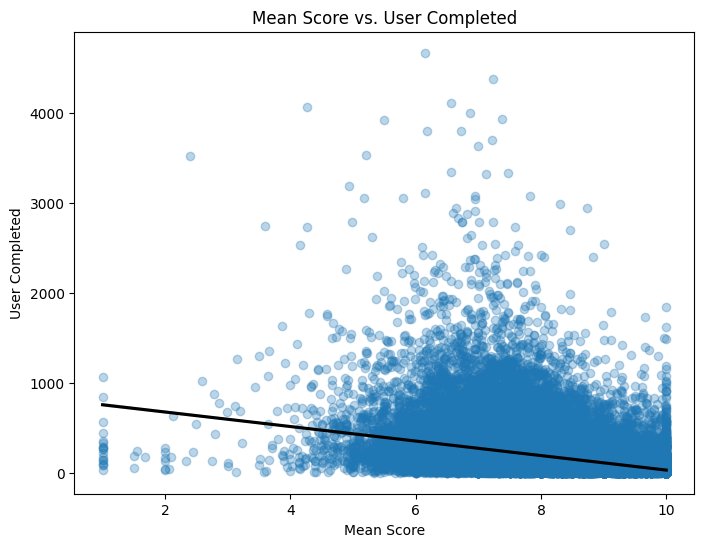

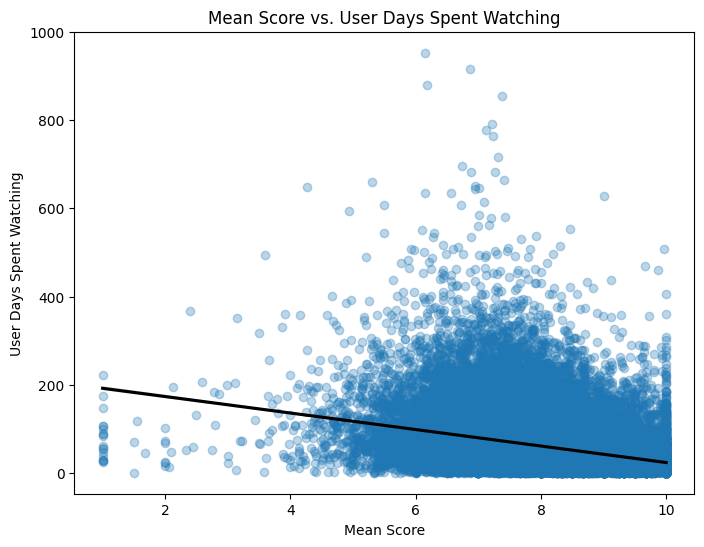

In [395]:
plt.figure(figsize=(8, 6))
sns.regplot(x='stats_mean_score', y='user_completed', data=user_country_stats, scatter_kws={'alpha':0.3}, line_kws={'color': 'black'})
plt.title('Mean Score vs. User Completed')
plt.xlabel('Mean Score')
plt.ylabel('User Completed')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='stats_mean_score', y='user_days_spent_watching', data=user_country_stats, scatter_kws={'alpha':0.3}, line_kws={'color': 'black'})
plt.title('Mean Score vs. User Days Spent Watching')
plt.xlabel('Mean Score')
plt.ylabel('User Days Spent Watching')
plt.show()

In [396]:
tmp = user_country_stats.sample(n=500, random_state=42).copy()

tmp['mean_score_category'] = pd.qcut(tmp['stats_mean_score'], 3, labels=['low', 'medium', 'high'])
tmp['completed_category'] = pd.qcut(tmp['user_completed'], 3, labels=['low', 'medium', 'high'])
tmp['days_spent_category'] = pd.qcut(tmp['user_days_spent_watching'], 3, labels=['low', 'medium', 'high'])

contingency_table_completed = pd.crosstab(tmp['mean_score_category'], tmp['completed_category'])

contingency_table_days_spent = pd.crosstab(tmp['mean_score_category'], tmp['days_spent_category'])

chi2_stat_completed, p_val_completed, dof_completed, expected_completed = chi2_contingency(contingency_table_completed)

chi2_stat_days_spent, p_val_days_spent, dof_days_spent, expected_days_spent = chi2_contingency(contingency_table_days_spent)

print(f"Chi-square test for Mean Score and User Completed:")
print(f"Chi-square statistic: {chi2_stat_completed}")
print(f"P-value: {p_val_completed}")

print(f"\nChi-square test for Mean Score and User Days Spent Watching:")
print(f"Chi-square statistic: {chi2_stat_days_spent}")
print(f"P-value: {p_val_days_spent}")

Chi-square test for Mean Score and User Completed:
Chi-square statistic: 53.40157794100588
P-value: 7.022420420867169e-11

Chi-square test for Mean Score and User Days Spent Watching:
Chi-square statistic: 39.017057813558736
P-value: 6.910159230681829e-08


**Conclusion**: We reject the null hypothesis and conclude that there is a significant association

**H2**: Users from countries with higher 'GDP per capita (current US$)' tend to watch more anime ('User Completed', 'User Watched Episodes') and potentially have higher 'Mean Scores', possibly reflecting better access or more leisure time/income.

In [397]:
correlation_with_completed = user_country_stats['GDP per capita (current US$)'].corr(user_country_stats['user_completed'])
correlation_with_days_spent = user_country_stats['GDP per capita (current US$)'].corr(user_country_stats['user_days_spent_watching'])
correlation_with_mean_score = user_country_stats['GDP per capita (current US$)'].corr(user_country_stats['stats_mean_score'])

print(f"Correlation between GDP per capita and User Completed: {correlation_with_completed}")
print(f"Correlation between GDP per capita and User Days Spent Watching: {correlation_with_days_spent}")
print(f"Correlation between GDP per capita and Mean Score: {correlation_with_mean_score}")

Correlation between GDP per capita and User Completed: -0.049227594442320624
Correlation between GDP per capita and User Days Spent Watching: -0.05220467832304506
Correlation between GDP per capita and Mean Score: -0.035823753105141014


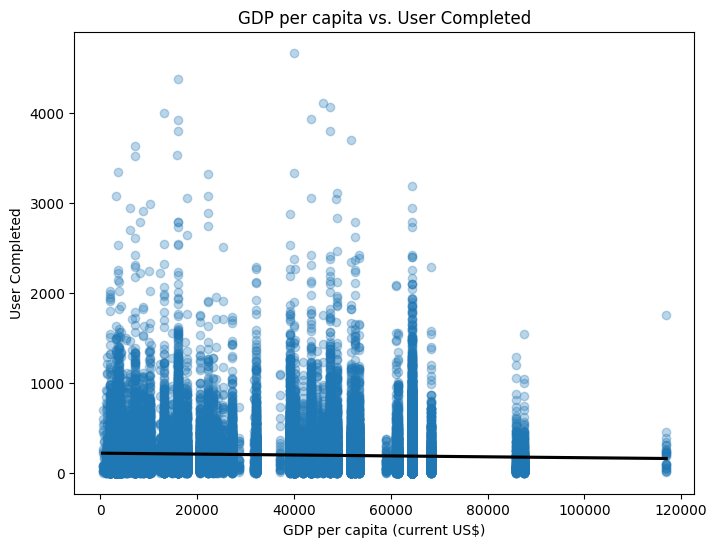

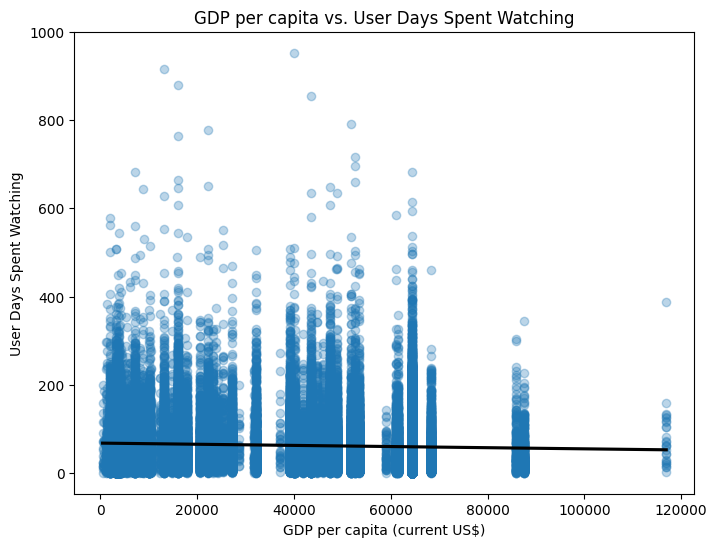

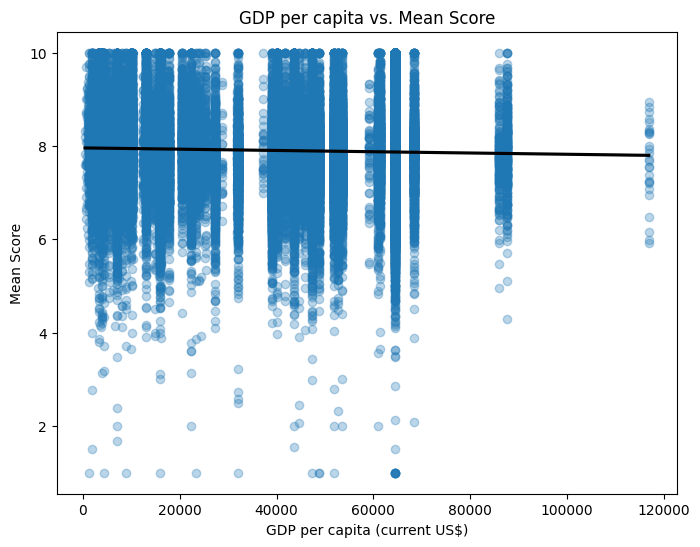

In [398]:
plt.figure(figsize=(8, 6))
sns.regplot(x='GDP per capita (current US$)', y='user_completed', data=user_country_stats, scatter_kws={'alpha':0.3}, line_kws={'color': 'black'})
plt.title('GDP per capita vs. User Completed')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('User Completed')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='GDP per capita (current US$)', y='user_days_spent_watching', data=user_country_stats, scatter_kws={'alpha':0.3}, line_kws={'color': 'black'})
plt.title('GDP per capita vs. User Days Spent Watching')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('User Days Spent Watching')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='GDP per capita (current US$)', y='stats_mean_score', data=user_country_stats, scatter_kws={'alpha':0.3}, line_kws={'color': 'black'})
plt.title('GDP per capita vs. Mean Score')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Mean Score')
plt.show()

In [399]:
tmp = user_country_stats.sample(n=500, random_state=42).copy()

tmp['gdp_category'] = pd.qcut(tmp['GDP per capita (current US$)'], 3, labels=['low', 'medium', 'high'])

tmp['completed_category'] = pd.qcut(tmp['user_completed'], 3, labels=['low', 'medium', 'high'])

tmp['days_spent_category'] = pd.qcut(tmp['user_days_spent_watching'], 3, labels=['low', 'medium', 'high'])

tmp['mean_score_category'] = pd.qcut(tmp['stats_mean_score'], 3, labels=['low', 'medium', 'high'])

contingency_table_completed = pd.crosstab(tmp['gdp_category'], tmp['completed_category'])

contingency_table_days_spent = pd.crosstab(tmp['gdp_category'], tmp['days_spent_category'])

contingency_table_mean_score = pd.crosstab(tmp['gdp_category'], tmp['mean_score_category'])

chi2_stat_completed, p_val_completed, dof_completed, expected_completed = chi2_contingency(contingency_table_completed)

chi2_stat_days_spent, p_val_days_spent, dof_days_spent, expected_days_spent = chi2_contingency(contingency_table_days_spent)

chi2_stat_mean_score, p_val_mean_score, dof_mean_score, expected_mean_score = chi2_contingency(contingency_table_mean_score)

print(f"Chi-square test for GDP and User Completed:")
print(f"Chi-square statistic: {chi2_stat_completed}")
print(f"P-value: {p_val_completed}")

print(f"\nChi-square test for GDP and User Days Spent Watching:")
print(f"Chi-square statistic: {chi2_stat_days_spent}")
print(f"P-value: {p_val_days_spent}")

print(f"\nChi-square test for GDP and Mean Score:")
print(f"Chi-square statistic: {chi2_stat_mean_score}")
print(f"P-value: {p_val_mean_score}")

Chi-square test for GDP and User Completed:
Chi-square statistic: 5.383837618156164
P-value: 0.25013050340042614

Chi-square test for GDP and User Days Spent Watching:
Chi-square statistic: 3.1269498625861756
P-value: 0.5368099282784534

Chi-square test for GDP and Mean Score:
Chi-square statistic: 8.533135573192155
P-value: 0.07388917746679664


 **Conclusion**: We fail to reject the null hypothesis and conclude that there is no significant association

**H3**: Higher 'Fixed broadband subscriptions', 'Mobile cellular subscriptions', or 'Secure Internet servers (per 1 million people)' correlate with higher 'User Completed' counts for users in that country.

In [400]:
correlation_with_days_broadband = user_country_stats['Fixed broadband subscriptions (per 100 people)'].corr(user_country_stats['stats_mean_score'])
correlation_with_mobile = user_country_stats['Mobile cellular subscriptions (per 100 people)'].corr(user_country_stats['stats_mean_score'])
correlation_with_server = user_country_stats['Secure Internet servers (per 1 million people)'].corr(user_country_stats['stats_mean_score'])

print(f"Correlation between Fixed broadband subscriptions and Mean Score: {correlation_with_days_broadband}")
print(f"Correlation between Mobile cellular subscriptions and Mean Score: {correlation_with_mobile}")
print(f"Correlation between Secure Internet servers and Mean Score: {correlation_with_server}")

Correlation between Fixed broadband subscriptions and Mean Score: -0.10001294168824629
Correlation between Mobile cellular subscriptions and Mean Score: 0.009402702266438736
Correlation between Secure Internet servers and Mean Score: 0.005194191434505355


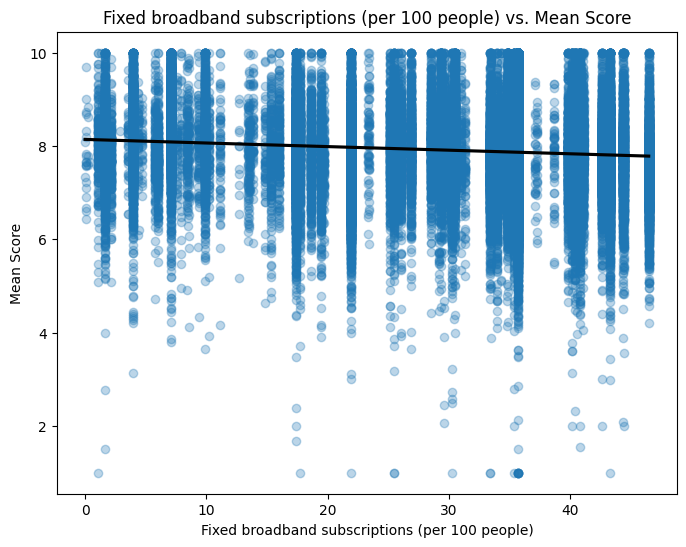

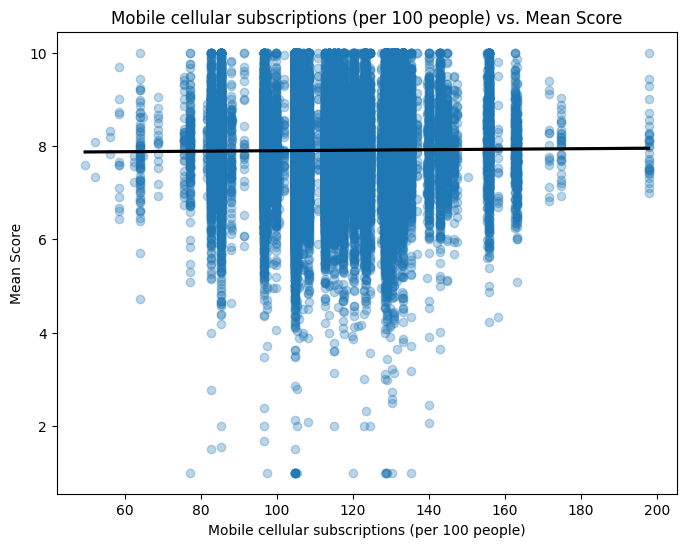

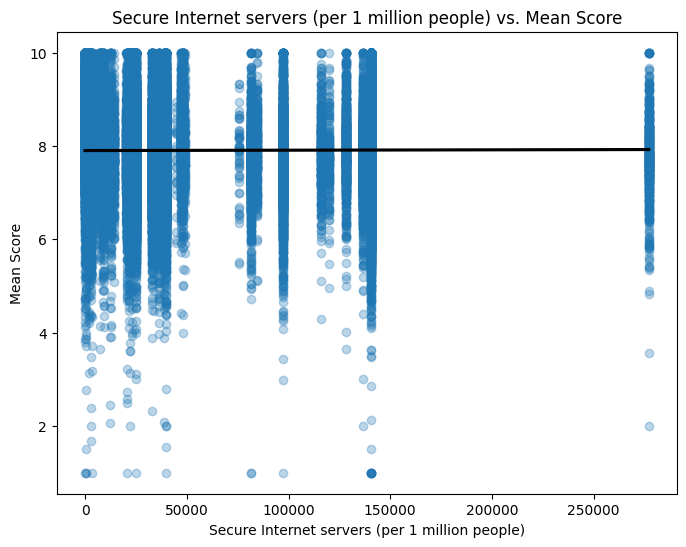

In [401]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Fixed broadband subscriptions (per 100 people)', y='stats_mean_score', data=user_country_stats, scatter_kws={'alpha':0.3}, line_kws={'color': 'black'})
plt.title('Fixed broadband subscriptions (per 100 people) vs. Mean Score')
plt.xlabel('Fixed broadband subscriptions (per 100 people)')
plt.ylabel('Mean Score')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='Mobile cellular subscriptions (per 100 people)', y='stats_mean_score', data=user_country_stats, scatter_kws={'alpha':0.3}, line_kws={'color': 'black'})
plt.title('Mobile cellular subscriptions (per 100 people) vs. Mean Score')
plt.xlabel('Mobile cellular subscriptions (per 100 people)')
plt.ylabel('Mean Score')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='Secure Internet servers (per 1 million people)', y='stats_mean_score', data=user_country_stats, scatter_kws={'alpha':0.3}, line_kws={'color': 'black'})
plt.title('Secure Internet servers (per 1 million people) vs. Mean Score')
plt.xlabel('Secure Internet servers (per 1 million people)')
plt.ylabel('Mean Score')
plt.show()

In [402]:
tmp = user_country_stats.sample(n=500, random_state=42).copy()

tmp['broadband_category'] = pd.qcut(tmp['Fixed broadband subscriptions (per 100 people)'], 3, labels=['low', 'medium', 'high'])
tmp['mobile_category'] = pd.qcut(tmp['Mobile cellular subscriptions (per 100 people)'], 3, labels=['low', 'medium', 'high'])
tmp['server_category'] = pd.qcut(tmp['Secure Internet servers (per 1 million people)'], 3, labels=['low', 'medium', 'high'])
tmp['mean_score_category'] = pd.qcut(tmp['stats_mean_score'], 3, labels=['low', 'medium', 'high'])

contingency_table_broadband = pd.crosstab(tmp['broadband_category'], tmp['mean_score_category'])

contingency_table_mobile = pd.crosstab(tmp['mobile_category'], tmp['mean_score_category'])

contingency_table_server = pd.crosstab(tmp['server_category'], tmp['mean_score_category'])

chi2_stat_broadband, p_val_broadband, dof_broadband, expected_broadband = chi2_contingency(contingency_table_broadband)

chi2_stat_mobile, p_val_mobile, dof_mobile, expected_mobile = chi2_contingency(contingency_table_mobile)

chi2_stat_server, p_val_server, dof_server, expected_server = chi2_contingency(contingency_table_server)

print(f"Chi-square test for Fixed broadband subscriptions (per 100 people) and Mean Score:")
print(f"Chi-square statistic: {chi2_stat_broadband}")
print(f"P-value: {p_val_broadband}")

print(f"\nChi-square test for Mobile cellular subscriptions (per 100 people) and Mean Score:")
print(f"Chi-square statistic: {chi2_stat_mobile}")
print(f"P-value: {p_val_mobile}")

print(f"\nChi-square test for Secure Internet servers (per 1 million people) and Mean Score:")
print(f"Chi-square statistic: {chi2_stat_server}")
print(f"P-value: {p_val_server}")

Chi-square test for Fixed broadband subscriptions (per 100 people) and Mean Score:
Chi-square statistic: 9.162235472910053
P-value: 0.05716984705773421

Chi-square test for Mobile cellular subscriptions (per 100 people) and Mean Score:
Chi-square statistic: 3.653328246357328
P-value: 0.45495040686979304

Chi-square test for Secure Internet servers (per 1 million people) and Mean Score:
Chi-square statistic: 9.243525206249089
P-value: 0.055292535695738776


 **Conclusion**: We fail to reject the null hypothesis and conclude that there is no significant association

**H4**: Higher national happiness correlates with higher average 'User Mean Score' from users in that country.

In [403]:
correlation = user_country_stats['Happiness Score'].corr(user_country_stats['stats_mean_score'])

print(f"Correlation between 'Happiness Score and Mean Score: {correlation}")

Correlation between 'Happiness Score and Mean Score: -0.06687589793370768


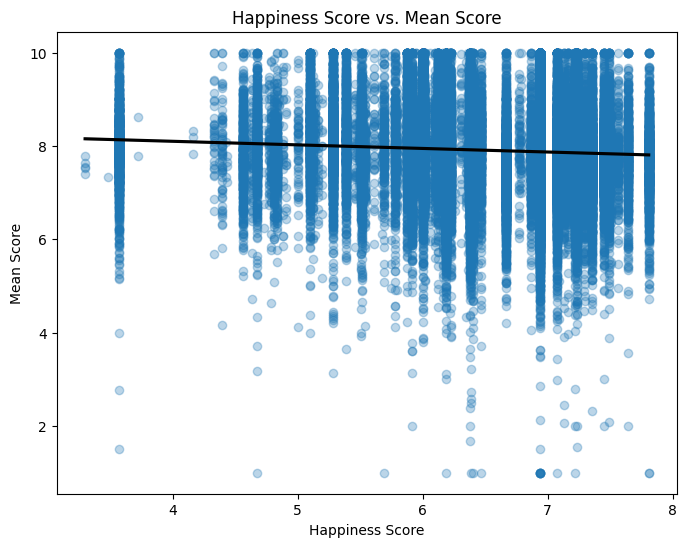

In [404]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Happiness Score', y='stats_mean_score', data=user_country_stats, scatter_kws={'alpha':0.3}, line_kws={'color': 'black'})
plt.title('Happiness Score vs. Mean Score')
plt.xlabel('Happiness Score')
plt.ylabel('Mean Score')
plt.show()

In [405]:
tmp = user_country_stats.sample(n=500, random_state=42).copy()

tmp['happiness_category'] = pd.qcut(tmp['Happiness Score'], 3, labels=['low', 'medium', 'high'])
tmp['mean_score_category'] = pd.qcut(tmp['stats_mean_score'], 3, labels=['low', 'medium', 'high'])

contingency_table = pd.crosstab(tmp['happiness_category'], tmp['mean_score_category'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test for Happiness Score and Mean Score:")
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-square test for Happiness Score and Mean Score:
Chi-square statistic: 5.702573456003083
P-value: 0.22248859870279736


**Conclusion**: We fail to reject the null hypothesis and conclude that there is no significant association

**H5**: Male and female users show differences in their anime watching habits, such as the total time spent watching anime or the average scores they give to anime.

In [406]:
correlation_with_days_spent_watching = user_country_stats['user_days_spent_watching'].corr(user_country_stats['gender_numeric'])
correlation_with_mean_score = user_country_stats['stats_mean_score'].corr(user_country_stats['gender_numeric'])

print(f"Correlation between Gender and User Days Spent Watching: {correlation_with_days_spent_watching}")
print(f"Correlation between Gender and Mean Score: {correlation_with_mean_score}")

Correlation between Gender and User Days Spent Watching: -0.17631070389647777
Correlation between Gender and Mean Score: 0.09952580830135989


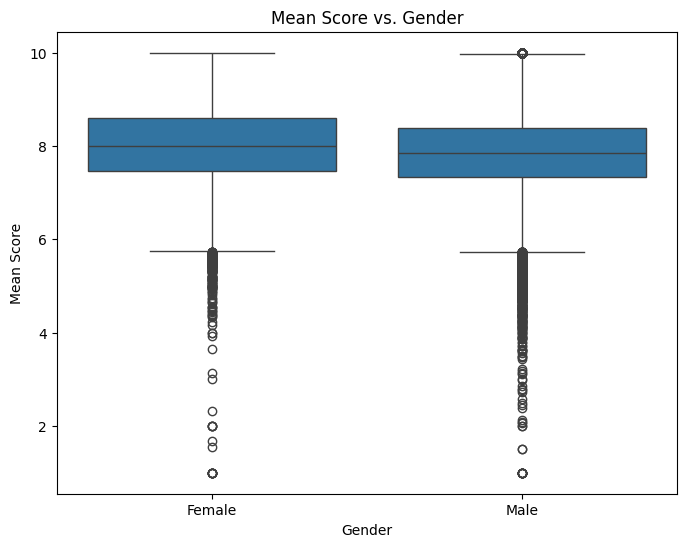

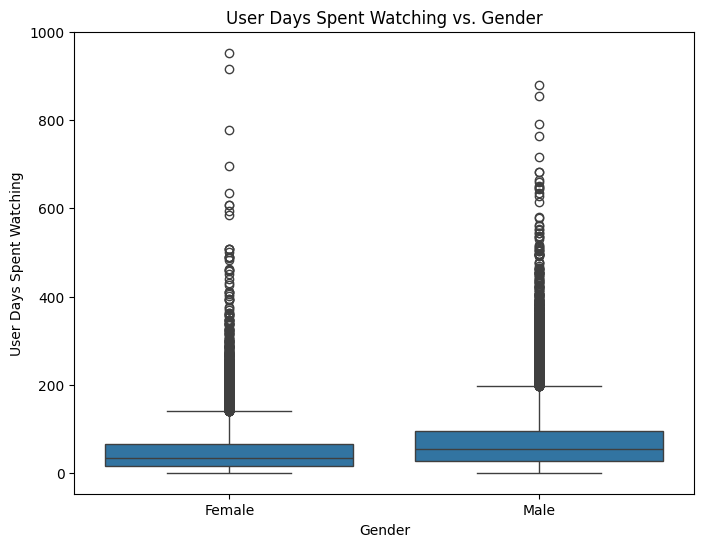

In [407]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='stats_mean_score', data=user_country_stats)
plt.title('Mean Score vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Score')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='user_days_spent_watching', data=user_country_stats)
plt.title('User Days Spent Watching vs. Gender')
plt.xlabel('Gender')
plt.ylabel('User Days Spent Watching')
plt.show()

In [408]:
tmp = user_country_stats.sample(n=500, random_state=42).copy()

tmp['mean_score_category'] = pd.qcut(tmp['stats_mean_score'], 3, labels=['low', 'medium', 'high'])
tmp['days_spent_watching_category'] = pd.qcut(tmp['user_days_spent_watching'], 3, labels=['low', 'medium', 'high'])

contingency_table_mean = pd.crosstab(tmp['gender'], tmp['mean_score_category'])
contingency_table_days_watching = pd.crosstab(tmp['gender'], tmp['days_spent_watching_category'])

chi2_stat_mean, p_val_mean, dof_mean, expected_mean = chi2_contingency(contingency_table_mean)

chi2_stat_days_watching, p_val_days_watching, dof_days_watching, expected_days_watching = chi2_contingency(contingency_table_days_watching)

print(f"Chi-square test for Mean Score and Gender:")
print(f"Chi-square statistic: {chi2_stat_mean}")
print(f"P-value: {p_val_mean}")

print(f"\nChi-square test for User Days Spent Watching and Gender:")
print(f"Chi-square statistic: {chi2_stat_days_watching}")
print(f"P-value: {p_val_days_watching}")

Chi-square test for Mean Score and Gender:
Chi-square statistic: 0.8739665445468503
P-value: 0.6459822371344817

Chi-square test for User Days Spent Watching and Gender:
Chi-square statistic: 12.10587008445579
P-value: 0.002350951727874106


 **Conclusion**:  We fail to reject the null hypothesis for average score and conclude that there is no significant association between gender and the average score users give to anime. However, we reject the null hypothesis for user days spent watching and conclude that there is a significant association between gender and the total time spent watching anime.

**H6**: Users from different regional indicators (e.g., Western Europe, Sub-Saharan Africa) exhibit distinct anime watching behaviors, such as mean score, watching time, or completed anime.

In [409]:
correlation_with_days_spent_watching = user_country_stats['user_days_spent_watching'].corr(user_country_stats['Regional indicator'])
correlation_with_mean_score = user_country_stats['stats_mean_score'].corr(user_country_stats['Regional indicator'])

print(f"Correlation between Regional indicator and User Days Spent Watching: {correlation_with_days_spent_watching}")
print(f"Correlation between Regional indicator and Mean Score: {correlation_with_mean_score}")

Correlation between Regional indicator and User Days Spent Watching: 0.011590359946842354
Correlation between Regional indicator and Mean Score: -0.0521957966286115


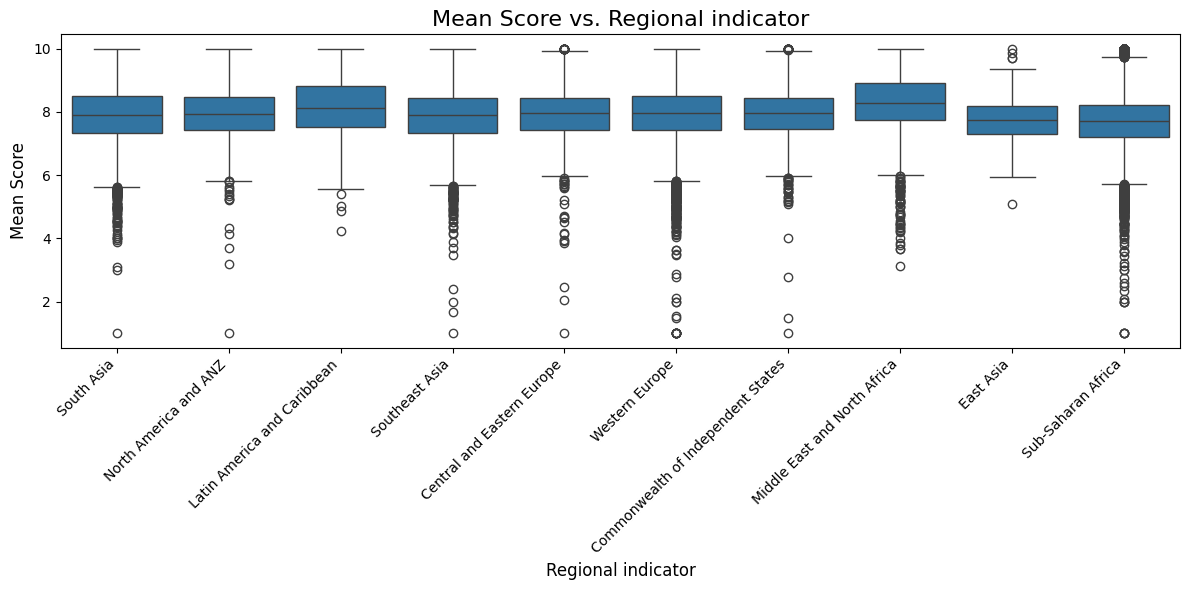

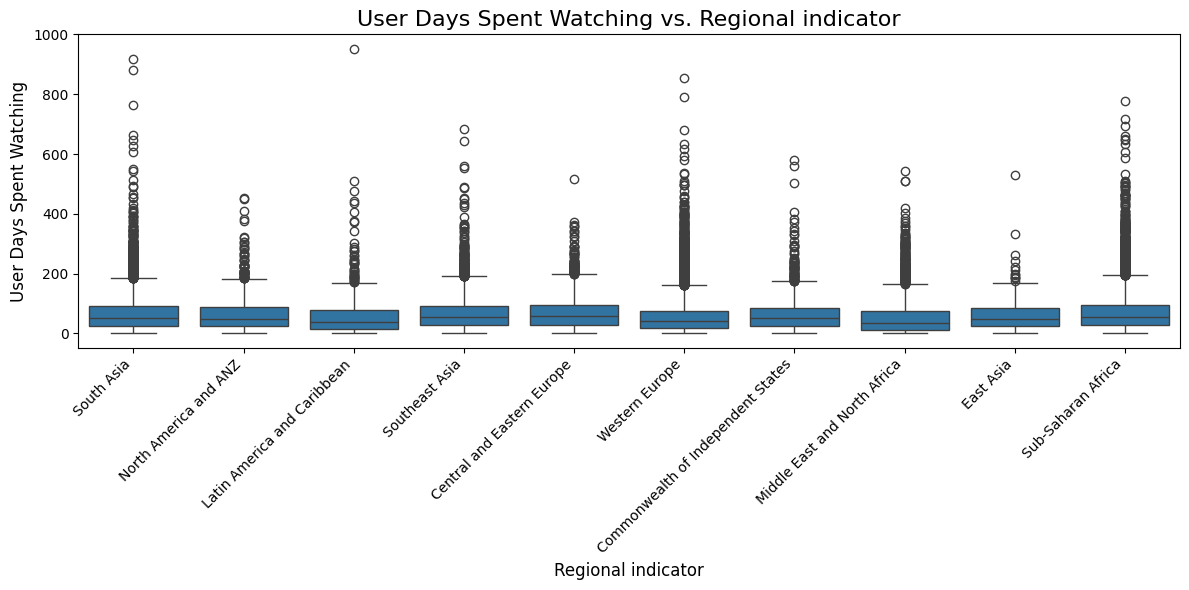

In [410]:
original_labels = label_encoder.inverse_transform(user_country_stats['Regional indicator'].unique())

plt.figure(figsize=(12, 6))
sns.boxplot(x='Regional indicator', y='stats_mean_score', data=user_country_stats)
plt.title('Mean Score vs. Regional indicator', fontsize=16)
plt.xlabel('Regional indicator', fontsize=12)
plt.ylabel('Mean Score', fontsize=12)
plt.xticks(ticks=np.arange(len(original_labels)), labels=original_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Regional indicator', y='user_days_spent_watching', data=user_country_stats)
plt.title('User Days Spent Watching vs. Regional indicator', fontsize=16)
plt.xlabel('Regional indicator', fontsize=12)
plt.ylabel('User Days Spent Watching', fontsize=12)
plt.xticks(ticks=np.arange(len(original_labels)), labels=original_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [411]:
tmp = user_country_stats.sample(n=500, random_state=42).copy()

tmp['mean_score_category'] = pd.qcut(tmp['stats_mean_score'], 3, labels=['low', 'medium', 'high'])
tmp['days_spent_watching_category'] = pd.qcut(tmp['user_days_spent_watching'], 3, labels=['low', 'medium', 'high'])

contingency_table_mean = pd.crosstab(tmp['Regional indicator'], tmp['mean_score_category'])
contingency_table_days_watching = pd.crosstab(tmp['Regional indicator'], tmp['days_spent_watching_category'])

chi2_stat_mean, p_val_mean, dof_mean, expected_mean = chi2_contingency(contingency_table_mean)

chi2_stat_days_watching, p_val_days_watching, dof_days_watching, expected_days_watching = chi2_contingency(contingency_table_days_watching)

print(f"Chi-square test for Mean Score and Regional indicator:")
print(f"Chi-square statistic: {chi2_stat_mean}")
print(f"P-value: {p_val_mean}")

print(f"\nChi-square test for User Days Spent Watching and Regional indicator:")
print(f"Chi-square statistic: {chi2_stat_days_watching}")
print(f"P-value: {p_val_days_watching}")

Chi-square test for Mean Score and Regional indicator:
Chi-square statistic: 30.314558157556036
P-value: 0.03449826829611721

Chi-square test for User Days Spent Watching and Regional indicator:
Chi-square statistic: 39.6734092927294
P-value: 0.0023117573694563078


**Conclusion**: We reject the null hypothesis and conclude that there is a significant association

**H7**: There's a positive correlation between the number of anime a user is currently watching and the number they plan to watch, suggesting active viewers tend to plan future viewing.

In [412]:
correlation = user_country_stats['user_watching'].corr(user_country_stats['user_plantowatch'])

print(f"Correlation between User Watching and User Plan to Watch: {correlation}")

Correlation between User Watching and User Plan to Watch: 0.20253436731703003


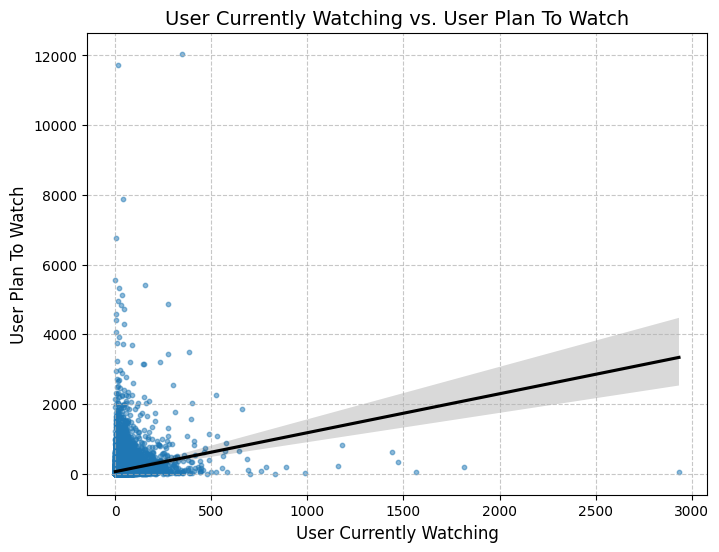

In [413]:
plt.figure(figsize=(8, 6))
sns.regplot(x='user_watching', y='user_plantowatch', data=user_country_stats, scatter_kws={'alpha':0.5, 's': 10}, line_kws={'color': 'black'})
plt.title('User Currently Watching vs. User Plan To Watch', fontsize=14)
plt.xlabel('User Currently Watching', fontsize=12)
plt.ylabel('User Plan To Watch', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [414]:
tmp = user_country_stats.sample(n=500, random_state=42).copy()

tmp['user_watching_category'] = pd.qcut(tmp['user_watching'], 3, labels=['low', 'medium', 'high'])
tmp['user_plantowatch_category'] = pd.qcut(tmp['user_plantowatch'], 3, labels=['low', 'medium', 'high'])

contingency_table = pd.crosstab(tmp['user_watching_category'], tmp['user_plantowatch_category'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test for User Currently Watching and User Plan To Watch:")
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-square test for User Currently Watching and User Plan To Watch:
Chi-square statistic: 76.58364062372213
P-value: 9.212465740454514e-16


**Conclusion**: We reject the null hypothesis and conclude that there is a significant association